## Grafs 23/24 - Sheet 5 - Due 24 December 2023

# Backtracking 


Backtracking is a class of algorithms that navigates the space of partial solutions in a depth first search. It incrementally builds candidates of partial solutions. As soon as it detects that a partial solution cannot be completed to a complete solution, it abandons this path ("backtracks"), and goes back to explore another partial solution until a complete solution is found.

The following toy example uses backtracking to compute all permutations of a list. A partial solution consists of the first `k` entries of a permutation.

In [ ]:
def permutations (L):
# returns a list containing all the permutations of L
    
    def swap(L,i,j):
#         Auxiliar function that swaps two entries of a list
        aux=L[i]
        L[i]=L[j]
        L[j]=aux

    
    def recursive_permutations(L,k):
#         Auxiliar recursive function that computes all permutations that 
#         leave invariant the first k entries of L
        
        solutions=[] #will contain the permutations

        if k>= len(L):
#             everything is fixed, there is only one permutation
                return [L.copy()]
        
        for i in range (k,len(L)):
#             we try all possible values at entry k
            swap(L,k,i)
            solutions=solutions+recursive_permutations(L.copy(),k+1)
            swap(L,k,i)
            
        return solutions

    return recursive_permutations(L,0)
    

In [ ]:
permutations([1,2,3,4])

A possible problem with the solution above is that a complete list with all the solutions is created and stored in the memory.

Generators are a python solution to this problem. A generator is a function in which a sequence of solutions are returned in an iterative way (using the command `yield`) but not stored. This allows to loop over the solutions like a list, without having to create the list. For example, the following function mimicks the function `range`.

In [ ]:
def our_range(n):
    i=0
    while i<n:
        yield i
        i=i+1

In [ ]:
range_gen=our_range(10)

for i in range_gen:
    print(i)
    
print("you can only iterate a generator once. You have to reinitialize before reuse, otherwise")
    
for i in range_gen:
    print(i)

print("but if you reinitialize it, it works again.")
    
range_gen=our_range(10)

for i in range_gen:
    print(i)


In [ ]:
for i in our_range(10):
    print(i)

You can get the next item of a generator using the function next(). If there is no other element, it raises a `StopIteration` exception. You can 'catch the exception' with the code below:

In [ ]:
range_gen=our_range(10)

i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
i=next(range_gen)
print(i) 
    

In [ ]:
for i in range_gen:
    print(i)

In [ ]:
i=next(range_gen)
print(i) 


In [ ]:
range_gen=our_range(10)

while True:
    try:
        i=next(range_gen)
        print(i) 
    except StopIteration:
        print('The generator is empty')
        break


We can turn our previous function into a generator.

In [ ]:
def permutations_gen (L):
# returns a generator containing all the permutations of L
    
    def swap(L,i,j):
#         Auxiliar function that swaps two entries of a list
        aux=L[i]
        L[i]=L[j]
        L[j]=aux

    
    def recursive_permutations_gen(L,k):
#         Auxiliar recursive function that returns a generator with all permutations that 
#         leave invariant the first k entries of L
        
        solutions=[] #will contain the permutations

        if k>= len(L):
#             everything is fixed, there is only one permutation
                yield L.copy()
        
        for i in range (k,len(L)):
#             we try all possible values at entry k
            swap(L,k,i)
            for s in recursive_permutations_gen(L.copy(),k+1):
                yield s
            swap(L,k,i)
            
        return

    return recursive_permutations_gen(L,0)
    

In [ ]:
permutations_gen([1,2,3])

In [ ]:
for p in permutations_gen([1,2,3]):
    print(p)

## Exercise 1

Given a graph $G=(V,E)$, code a generator `perfect_matchings(G)` that yields all the perfect matchings of a simple graph 'G'. You can backtrack whenever $G\setminus V(M)$ has a connected component of odd order, for a partial solution $M$.

In [25]:
def perfect_matchings(G):

    def perfect_matchings_rec(H): # Auxiliar recursive function that returns a generator 

# Write here the code for Exercise 1

# First, check if the condition to backtrack is satisfied , if so: return
        for s in H.connected_components_sizes() :
            if s % 2 == 1 :
                return

# If the graph is empty, yield an empty list
        if H.order() == 0 :
            yield []
# Otherwise add an edge and check recursively for perfect matchings
        else :
            solutions = []
            for u, v in H.edge_iterator(labels=False) :
                T = H.copy()
                T.delete_vertices([u, v])
                for e in perfect_matchings_rec(T) :
                    if all(not set(e +[(u, v)]) == set(s) for s in solutions) :  
                        solutions.append(e + [(u, v)])
                        yield e + [(u, v)]
# If you modify the graph G, don't forget to re-modify G afterwards
# Every perfect matching should be returned only once, avoid finding them several times

        return
          
    return perfect_matchings_rec(G.copy())

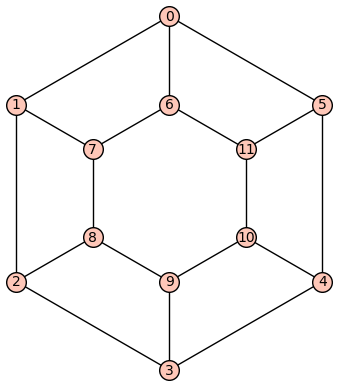

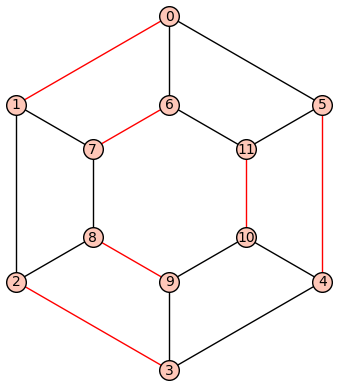

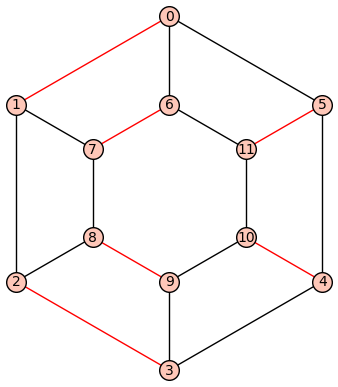

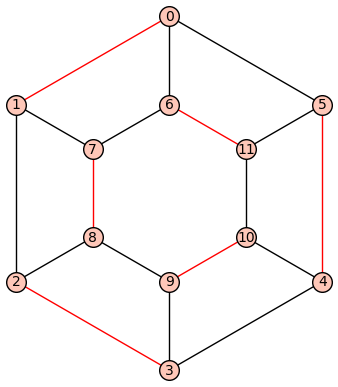

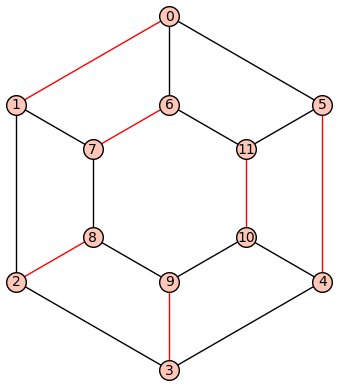

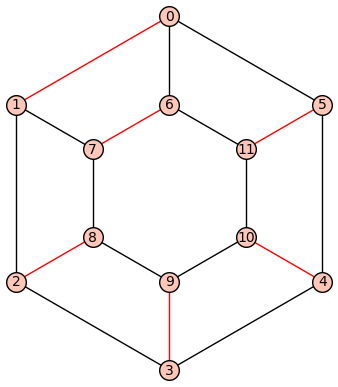

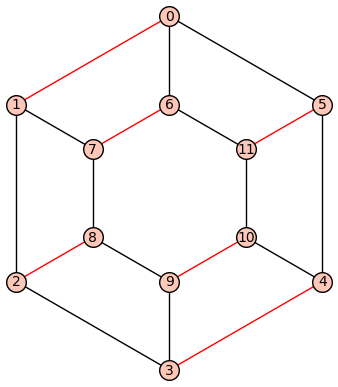

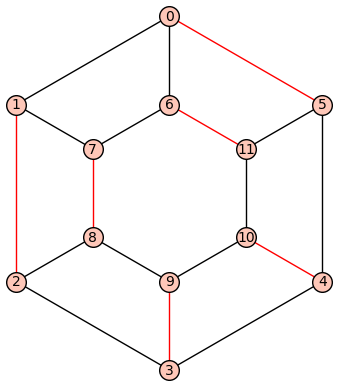

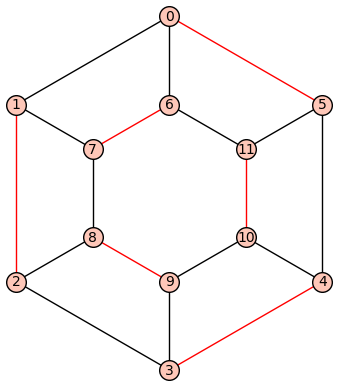

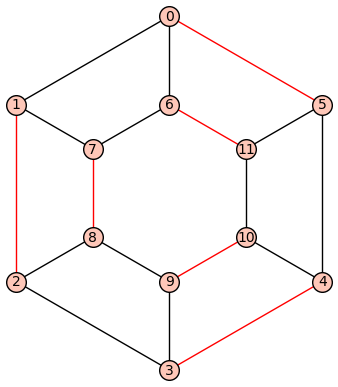

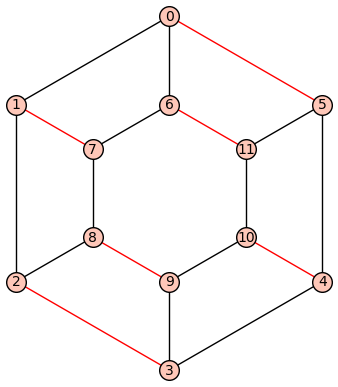

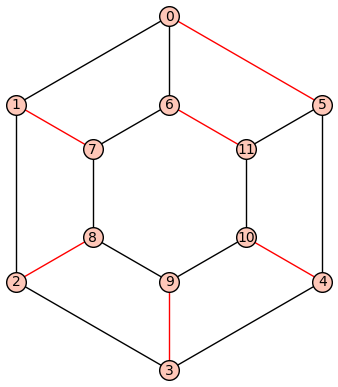

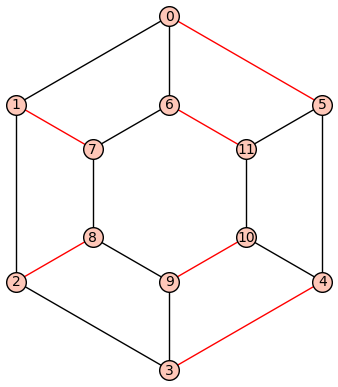

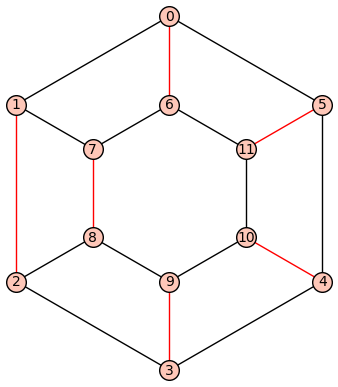

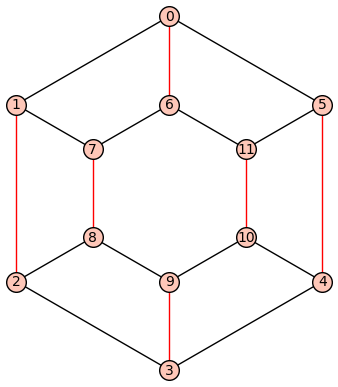

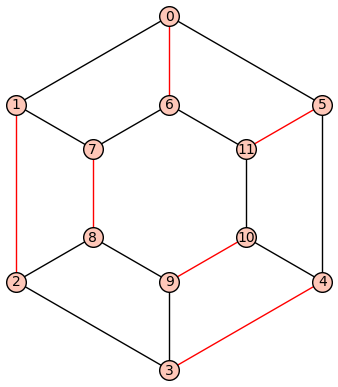

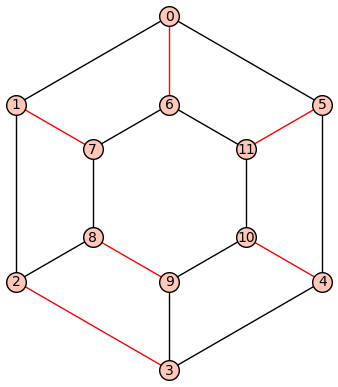

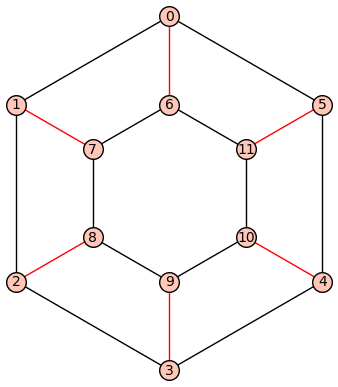

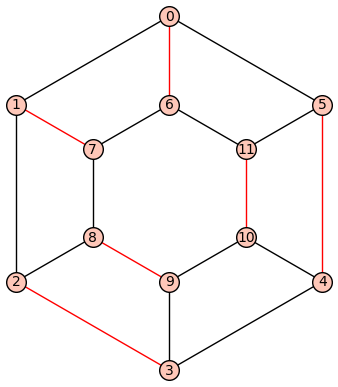

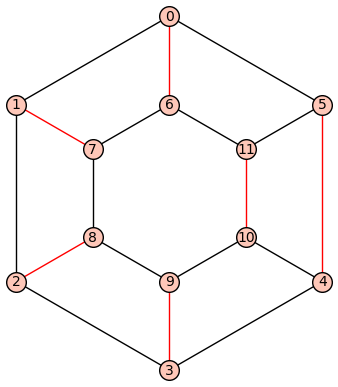

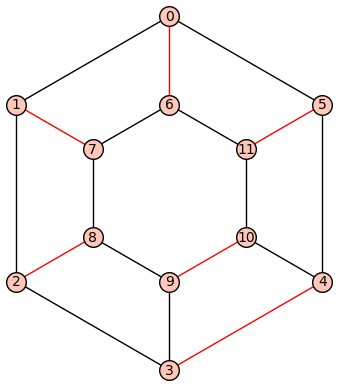

In [26]:
G=graphs.GeneralizedPetersenGraph(6,1)

G.show()

for m in perfect_matchings(G):
    G.show(edge_colors={'red':m})

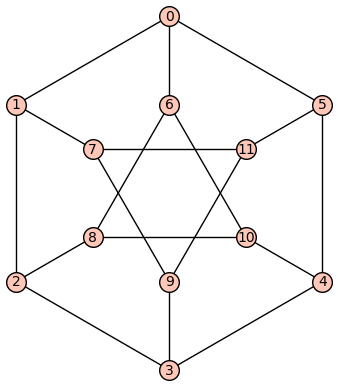

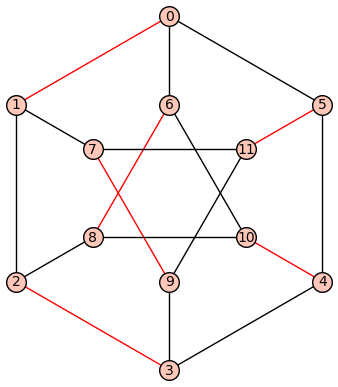

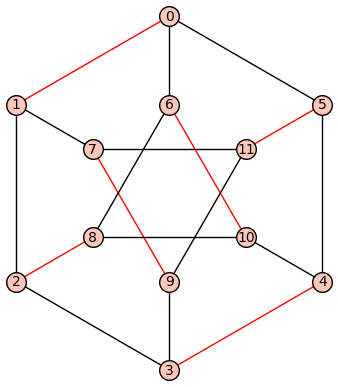

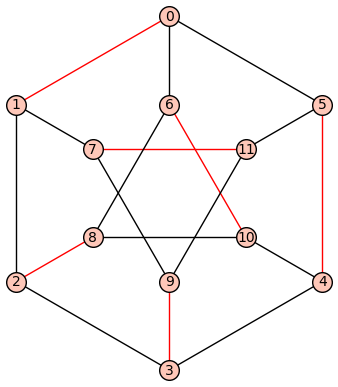

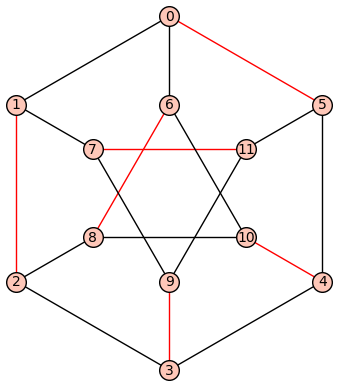

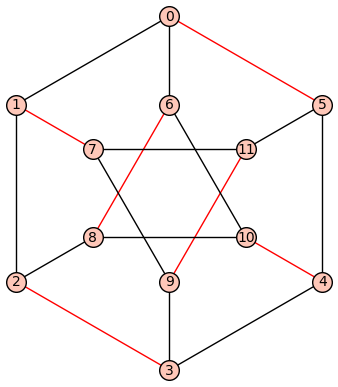

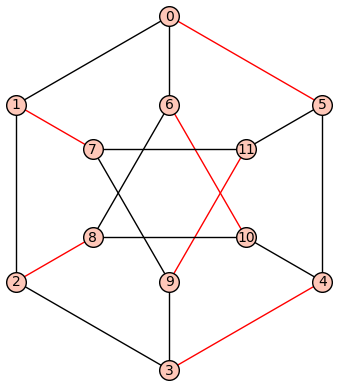

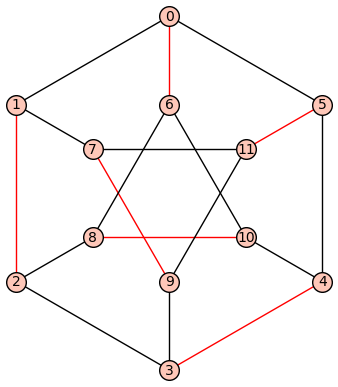

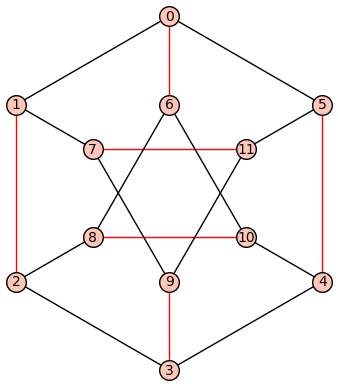

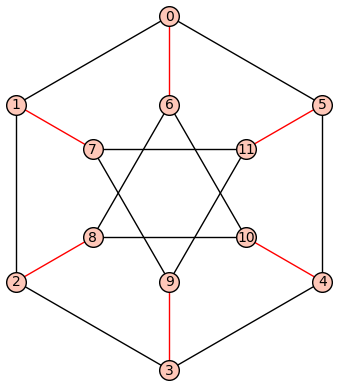

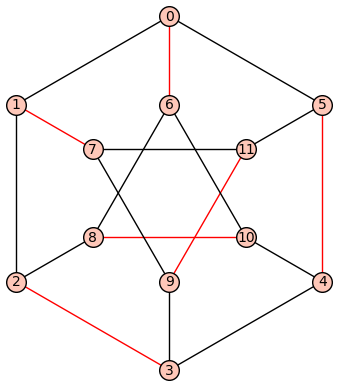

In [27]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.show()

for m in perfect_matchings(G):
    G.show(edge_colors={'red':m})

## Exercise 2

Modify the above function to generate all hamiltonian cycles of a given connected cubic graph (that is, a regular graph of degree 3). Recall that, in a cubic graph, a hamiltonian cycle is the complement of a perfect matching. Therefore, generating hamiltonian cycles is equivalent to generating perfect matchings whose removal do not  disconnect the graph. This means that you can addtionally backtrack if $G\setminus E(M)$ is disconnected.

In [66]:
def hamiltonian_cycles_cubic(G):

# Check if the graph G is cubic
    
    def hamiltonian_cycles_cubic_rec(G_pm,G_ham): # Auxiliar recursive function that returns a generator 

# Write here the code for Exercise 2
        # Check if G_pm has a connected component of odd length
        if any(s % 2 == 1 for s in G_pm.connected_components_sizes()) :
            return
        
        # Check if G_ham is disconnected
        if not G_ham.is_connected() :
            return 
        
        # If G_pm graph is empty yield G_ham
        if G_pm.order() == 0 :
            G_ham.show()
            yield G_ham.copy()
            
        # Otherwise delete another edge and check recursively for a hamiltonian cycle
        else :
            solutions = []

            for u, v in G_pm.edge_iterator(labels=False) :
                T=G_pm.copy()
                T.delete_vertices([u, v])
                G_ham.delete_edge(u, v)
                for ham in hamiltonian_cycles_cubic_rec(T, G_ham.copy()) :
                    if ham not in solutions:
                        solutions.append(ham.copy())
                        yield ham
                G_ham.add_edge(u, v)

        return
    
    return hamiltonian_cycles_cubic_rec(G.copy(),G.copy())


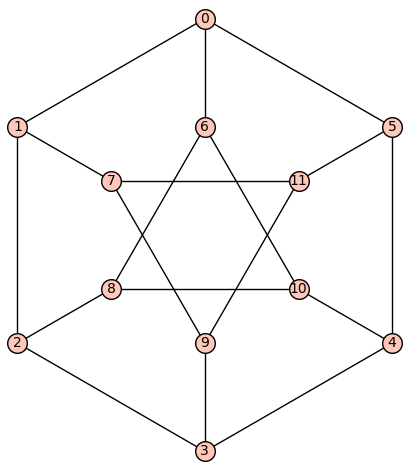

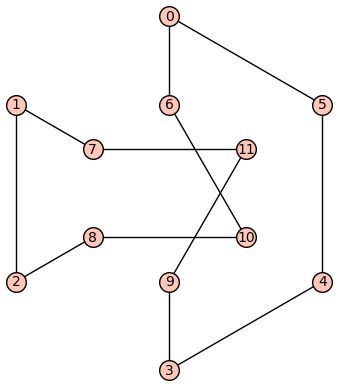

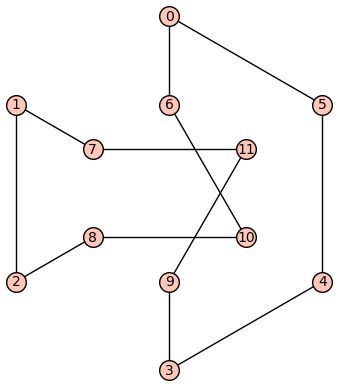

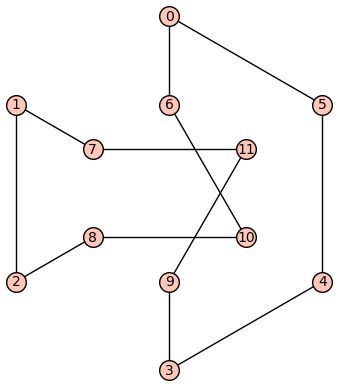

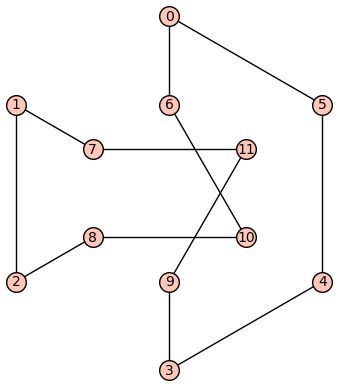

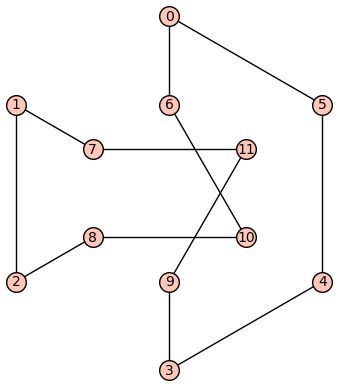

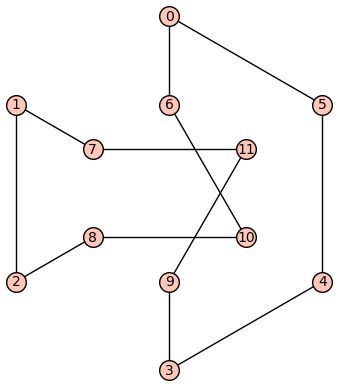

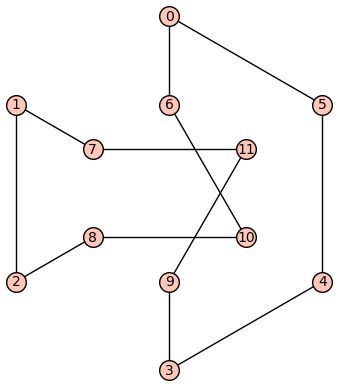

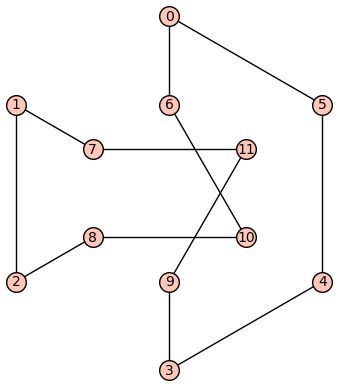

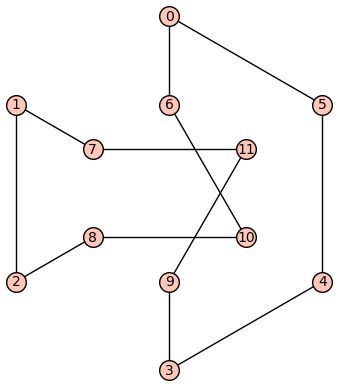

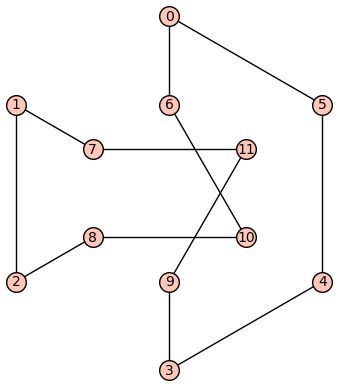

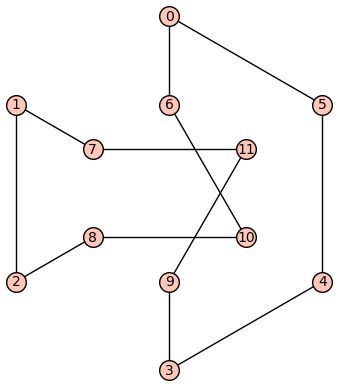

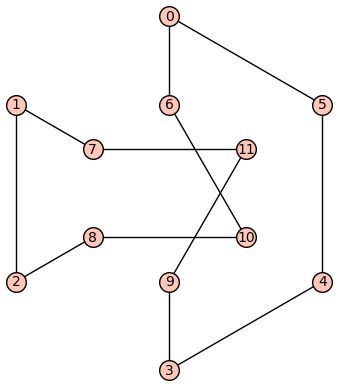

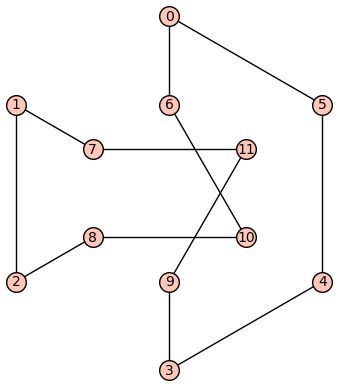

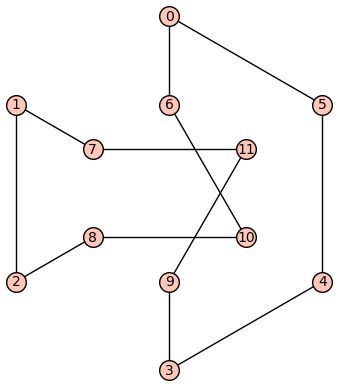

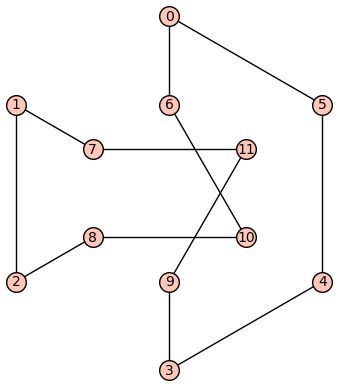

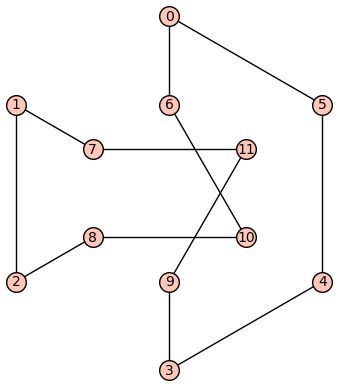

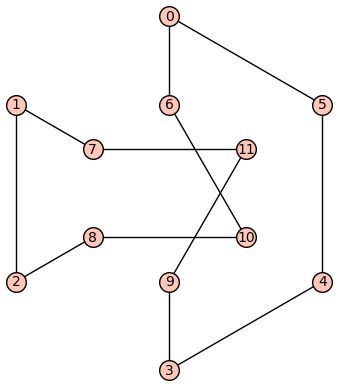

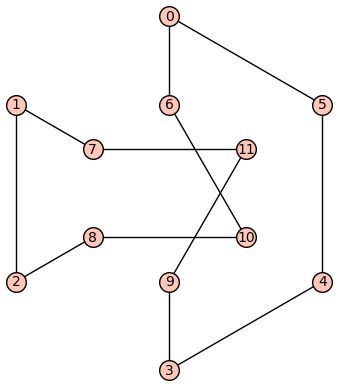

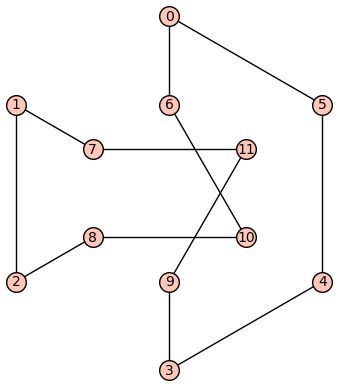

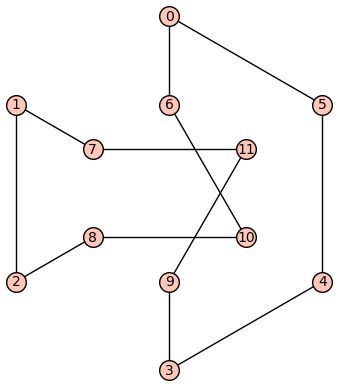

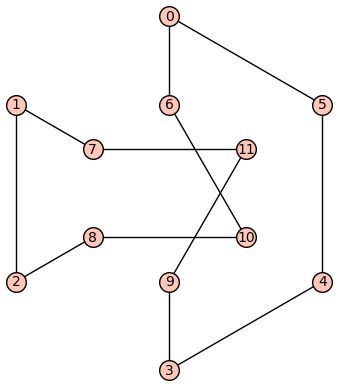

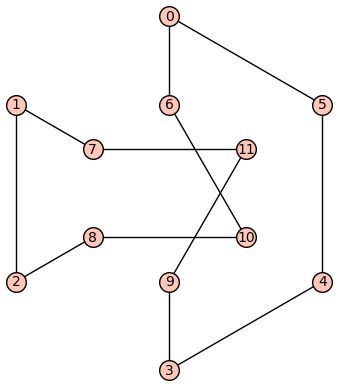

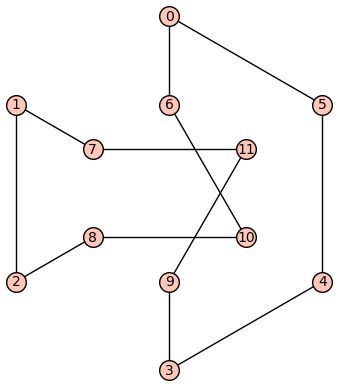

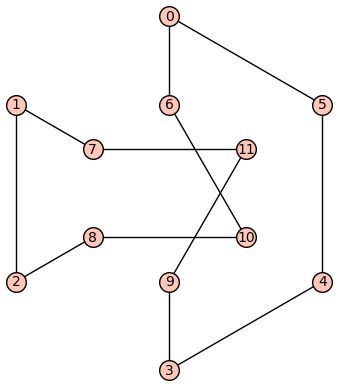

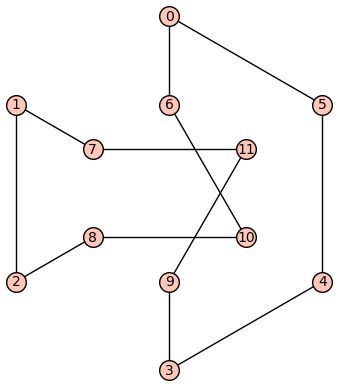

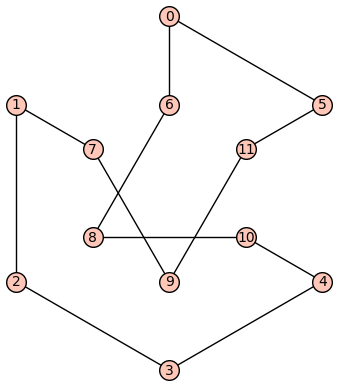

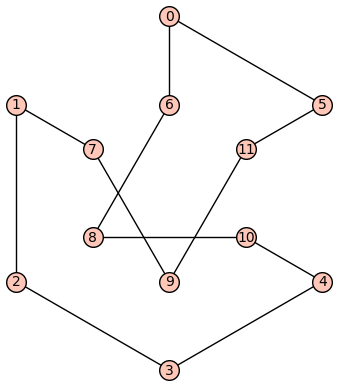

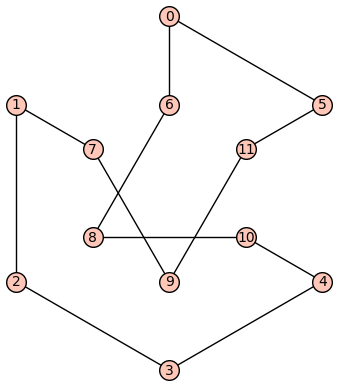

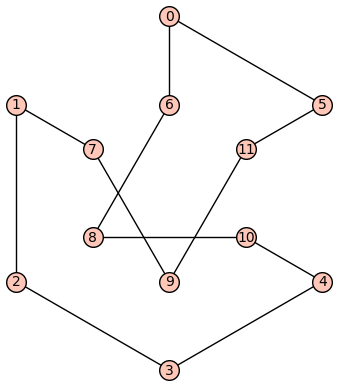

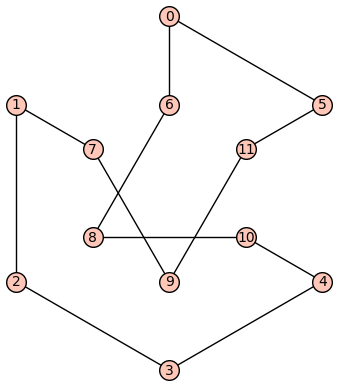

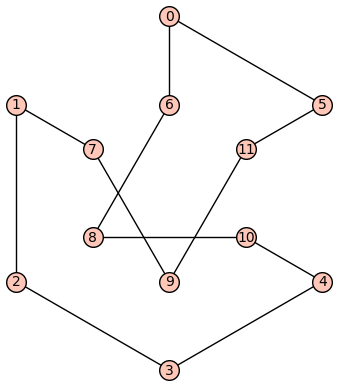

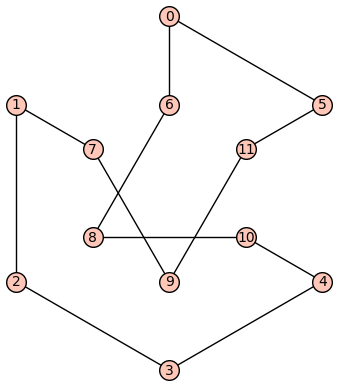

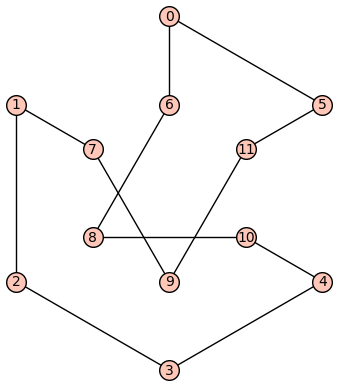

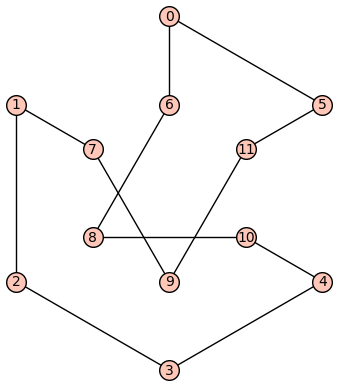

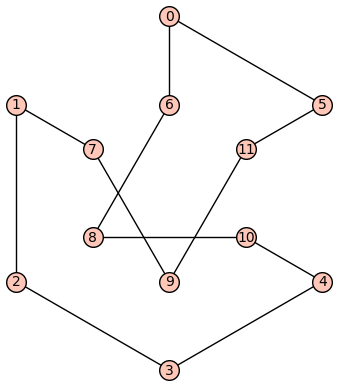

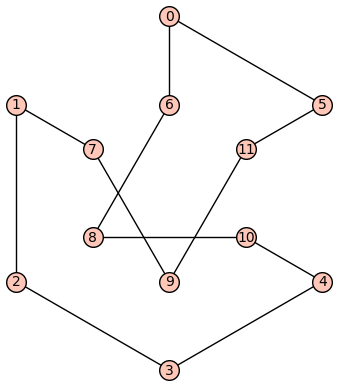

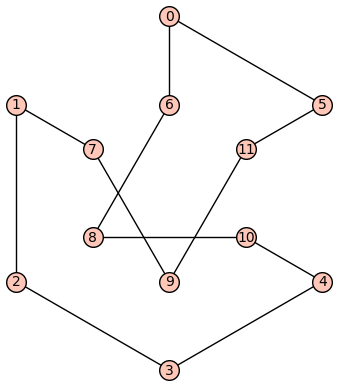

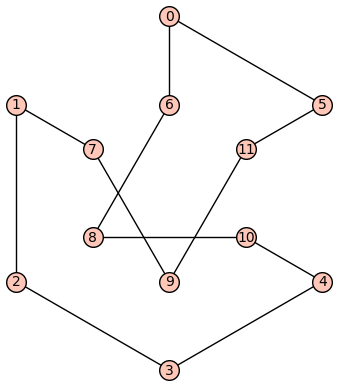

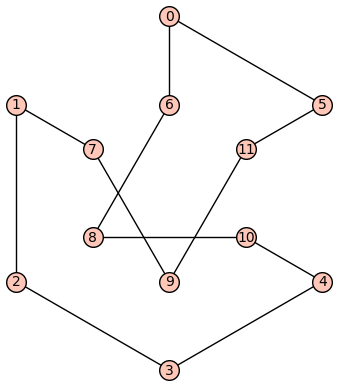

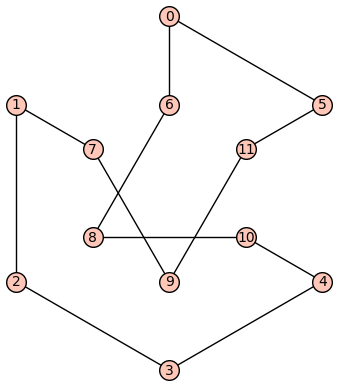

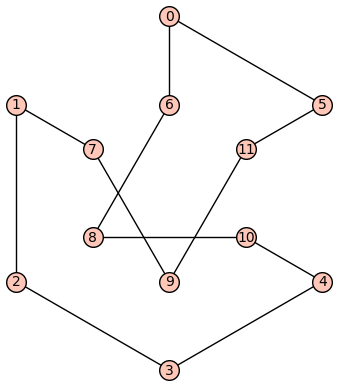

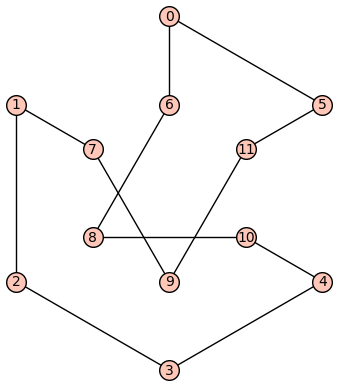

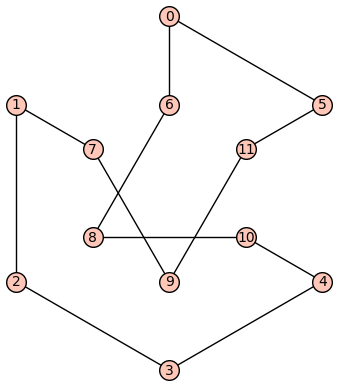

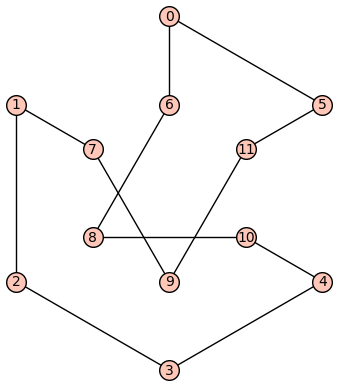

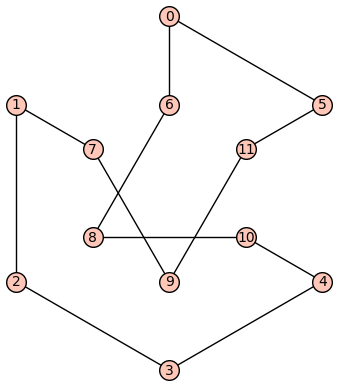

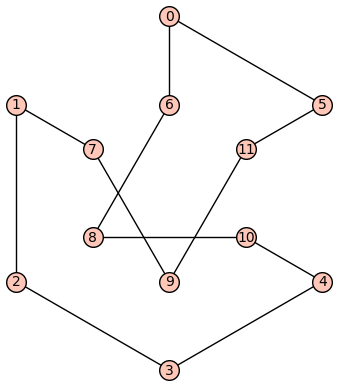

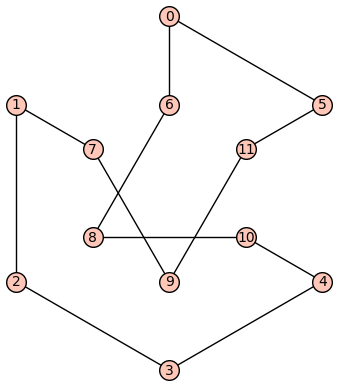

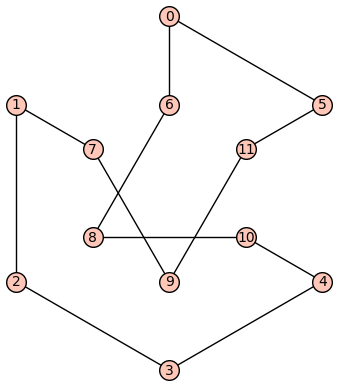

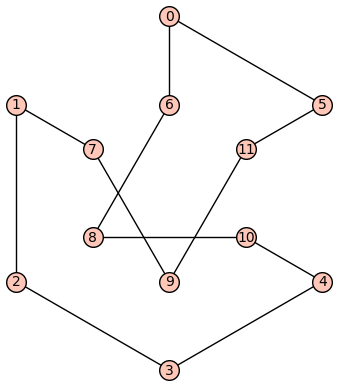

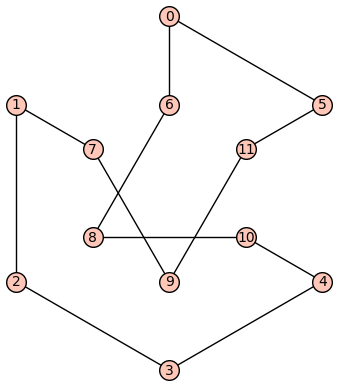

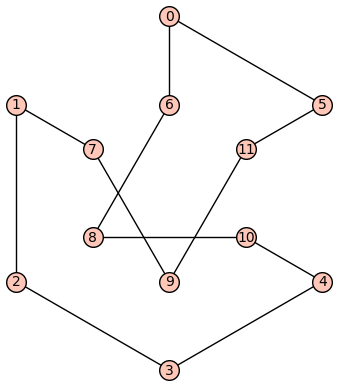

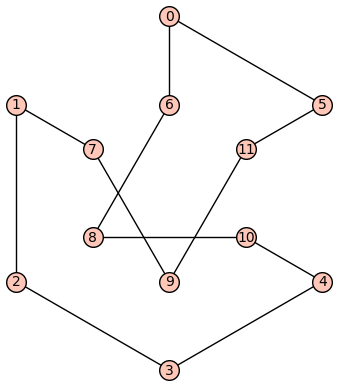

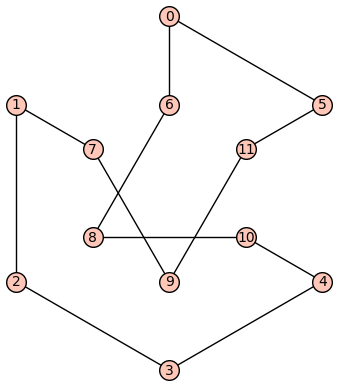

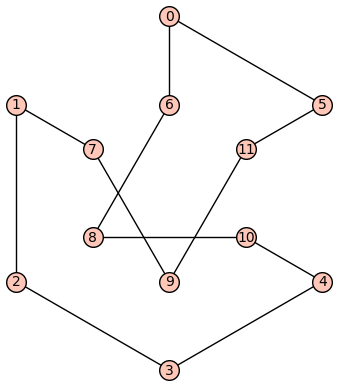

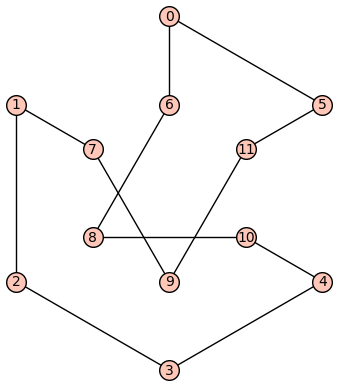

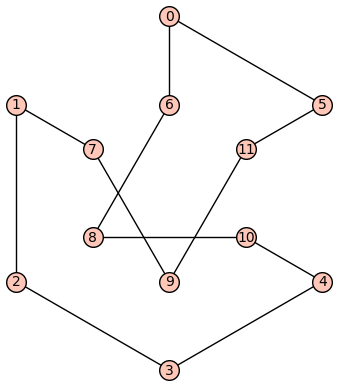

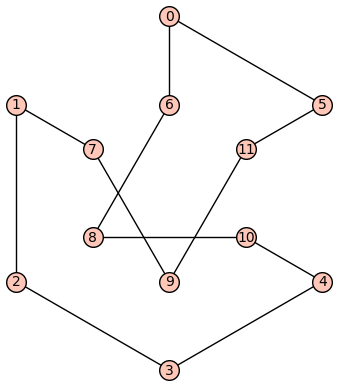

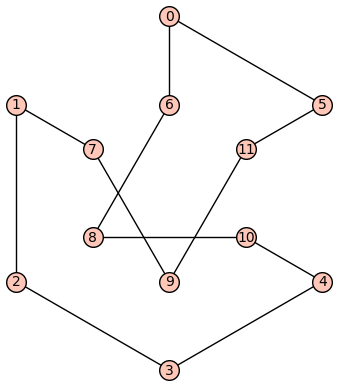

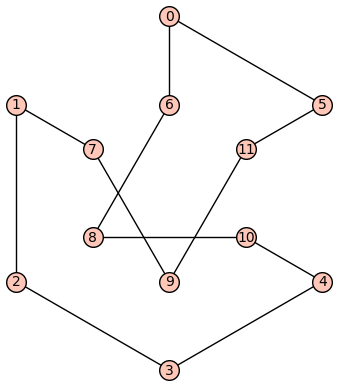

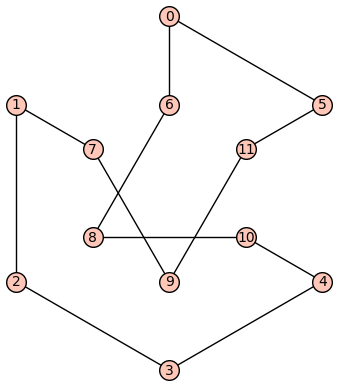

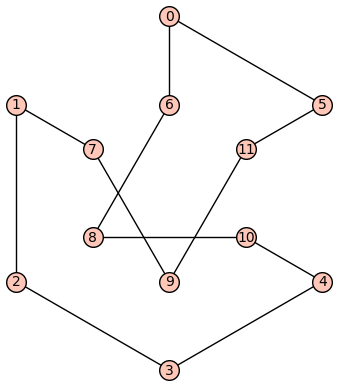

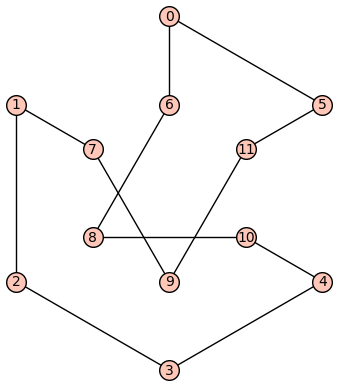

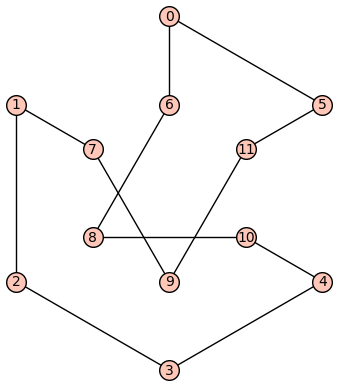

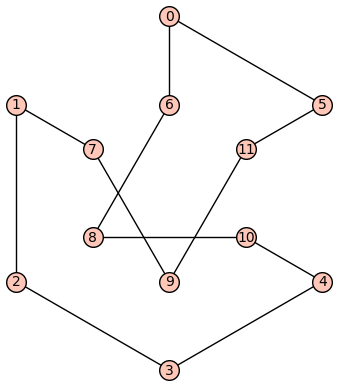

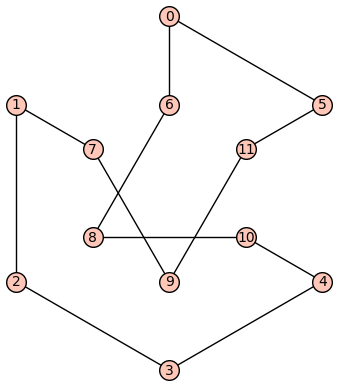

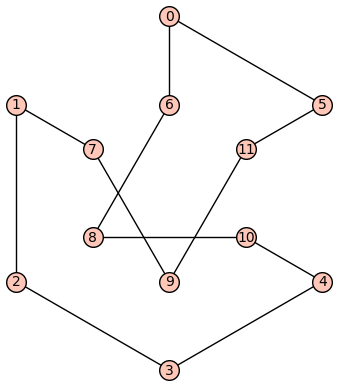

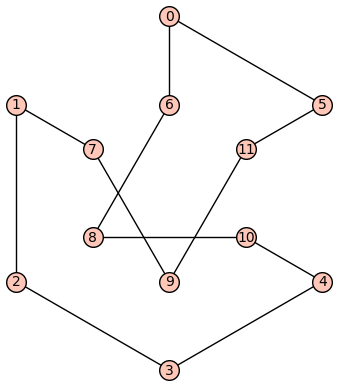

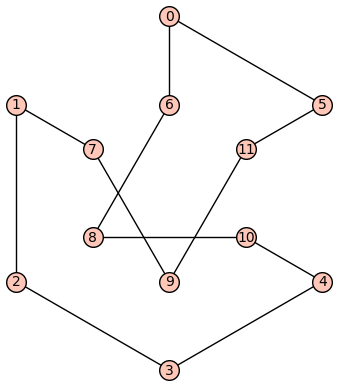

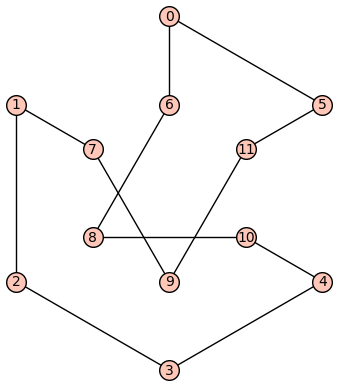

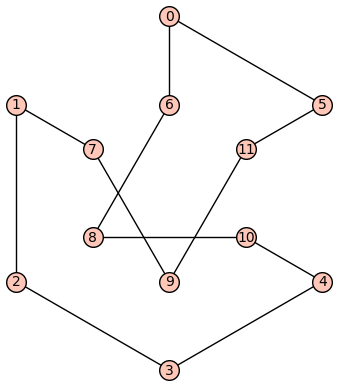

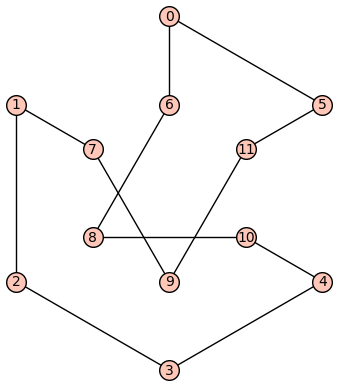

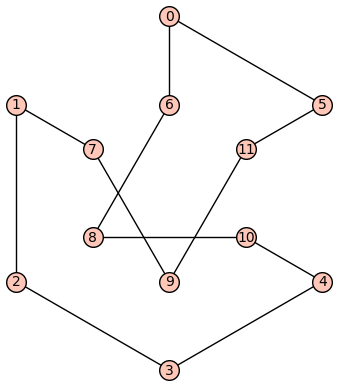

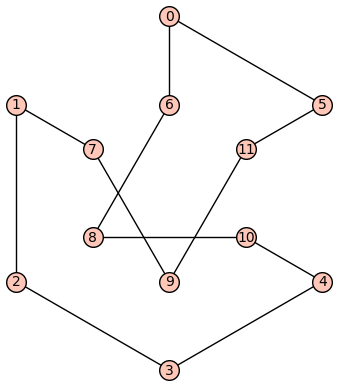

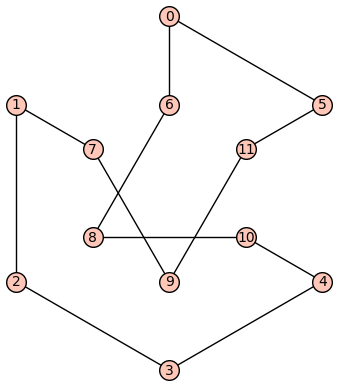

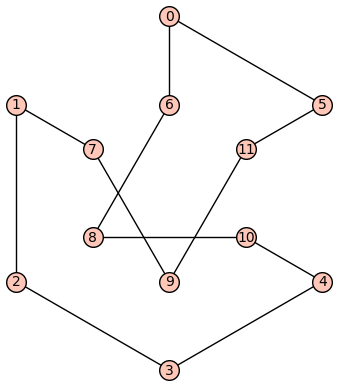

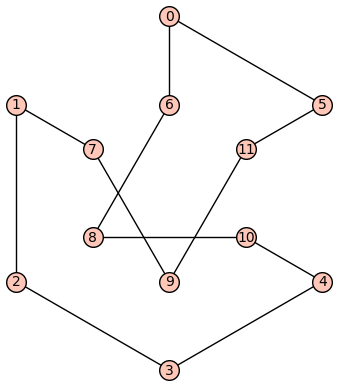

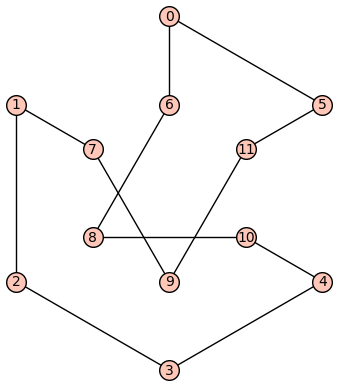

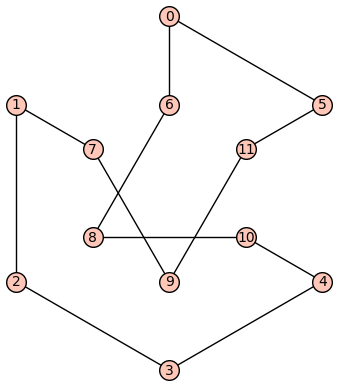

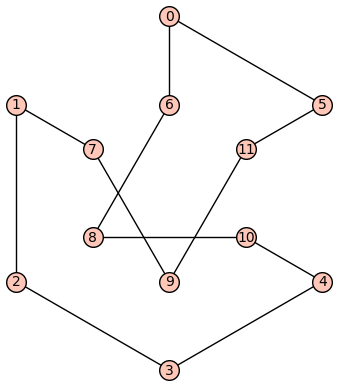

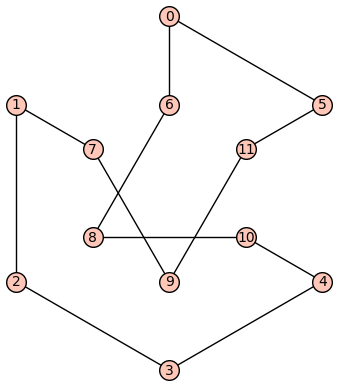

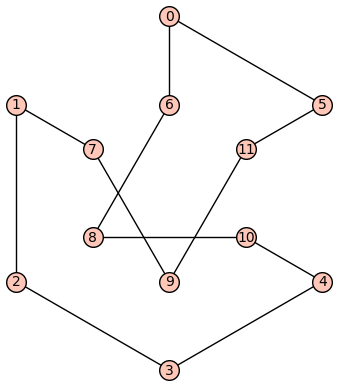

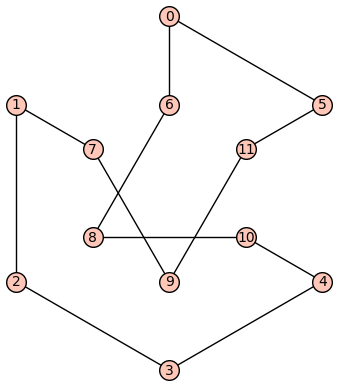

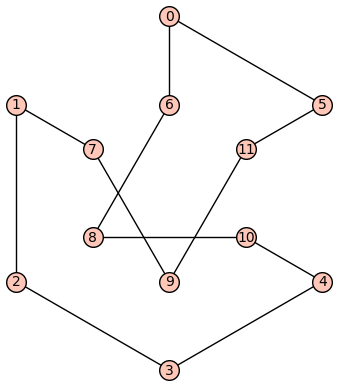

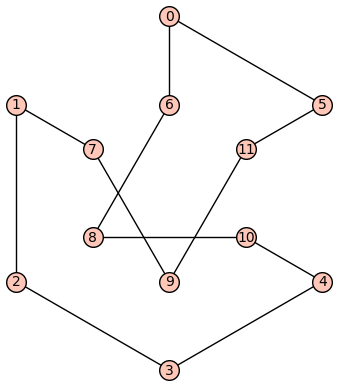

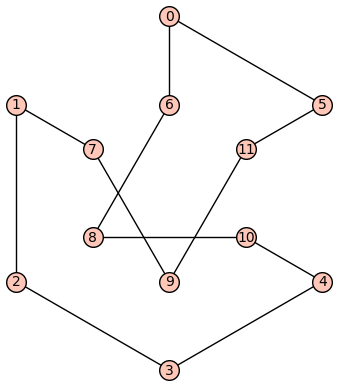

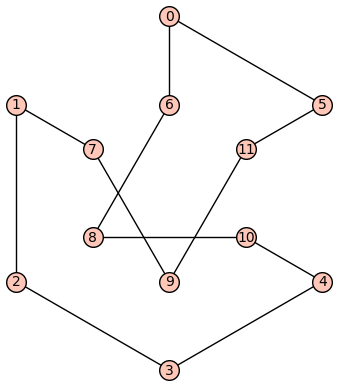

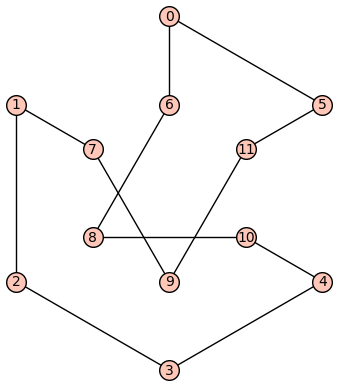

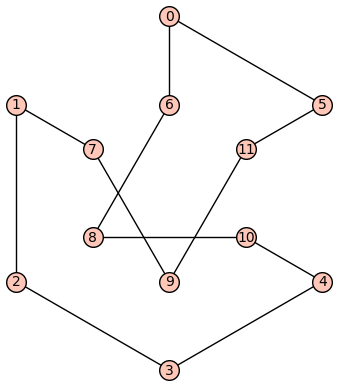

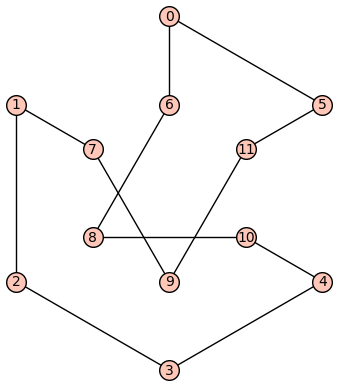

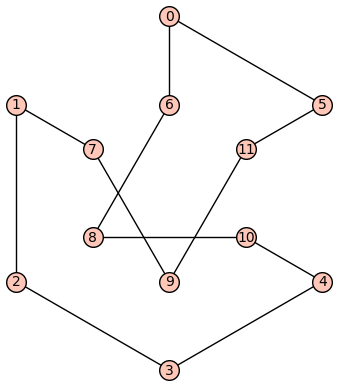

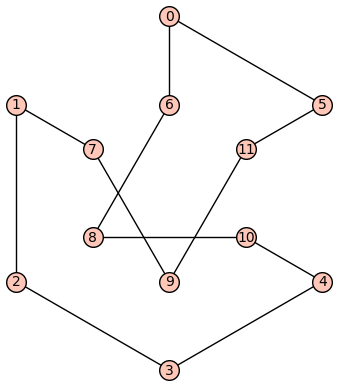

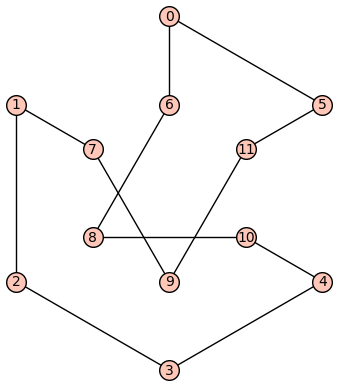

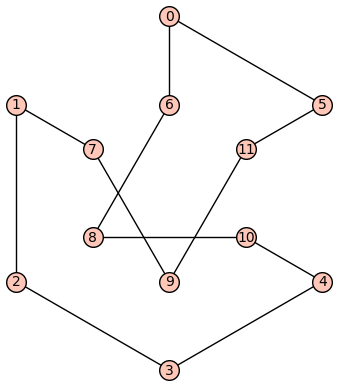

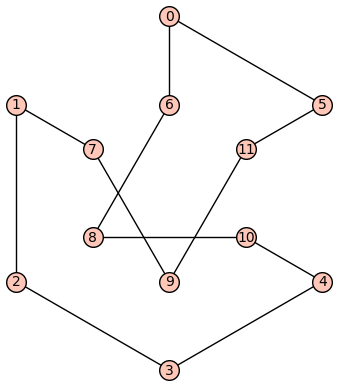

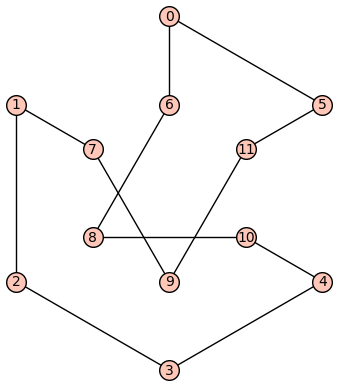

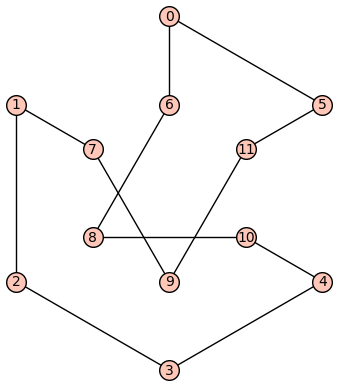

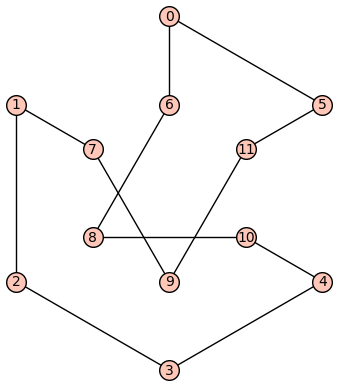

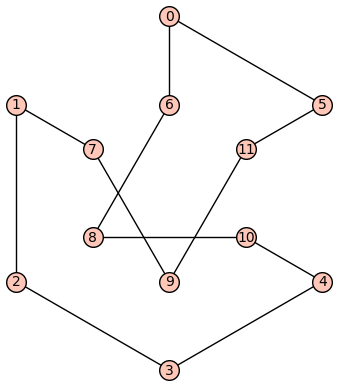

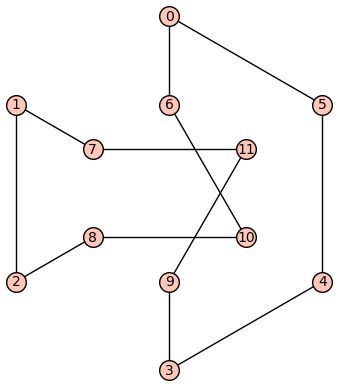

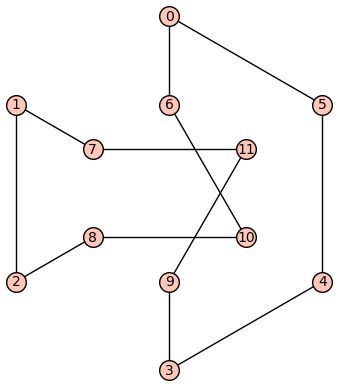

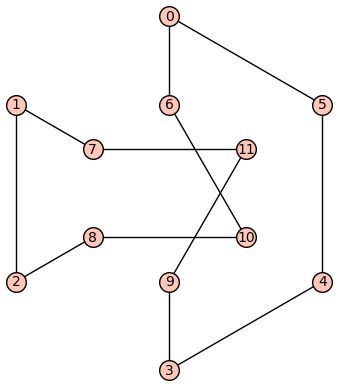

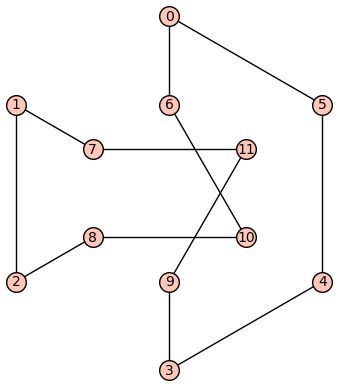

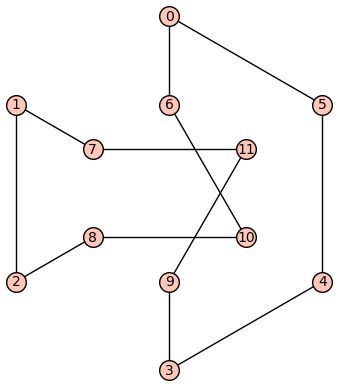

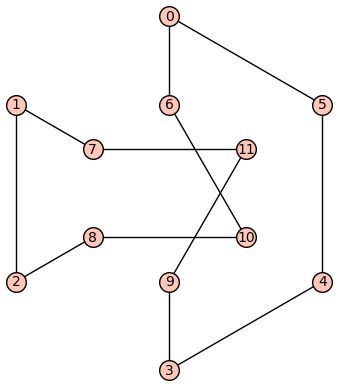

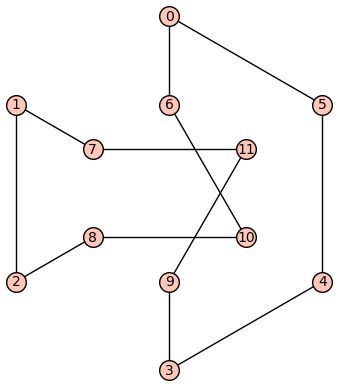

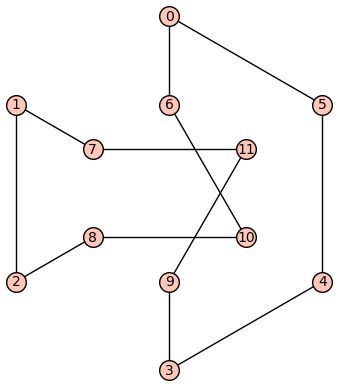

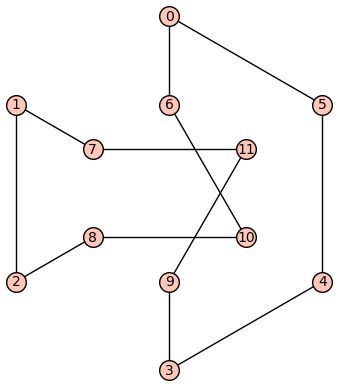

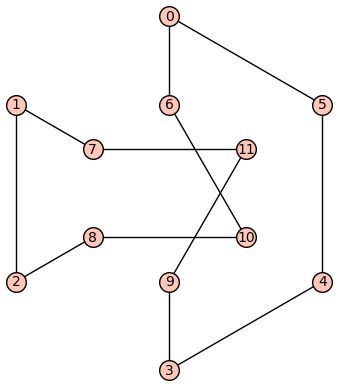

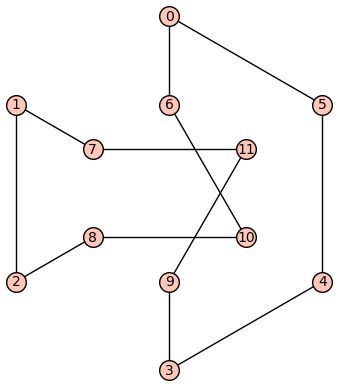

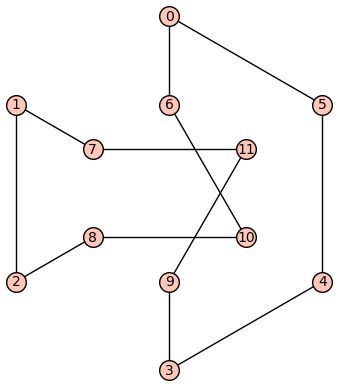

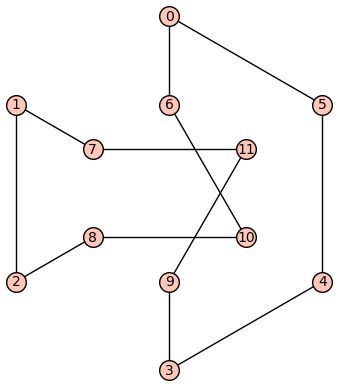

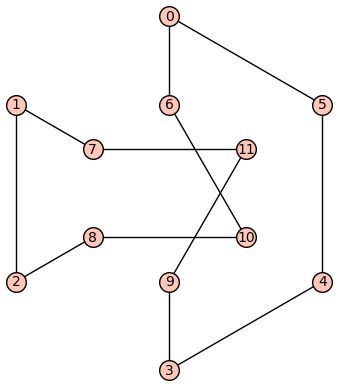

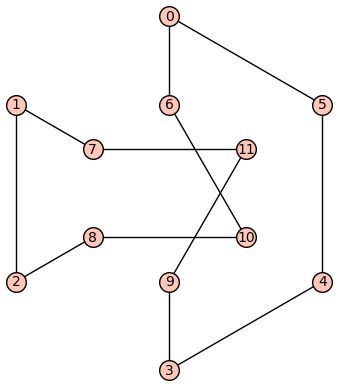

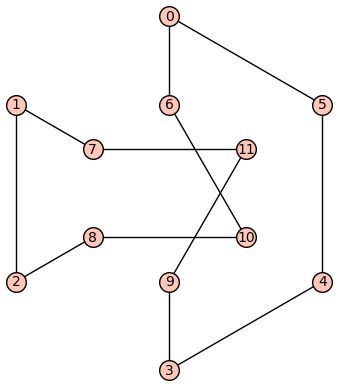

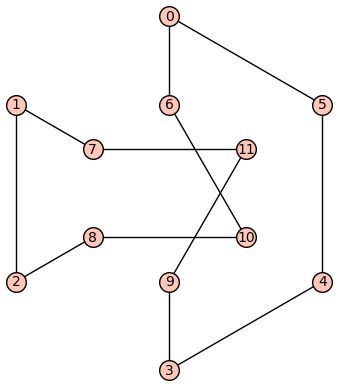

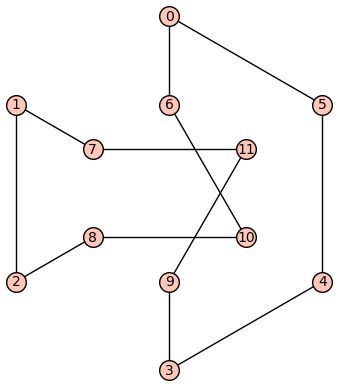

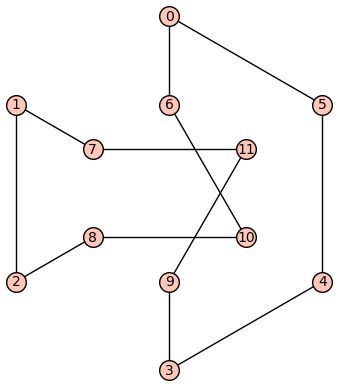

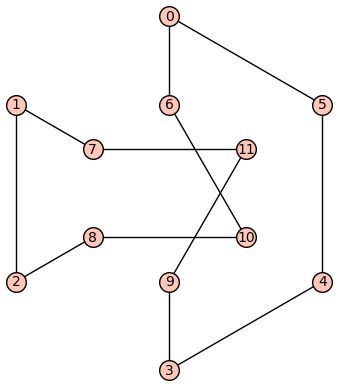

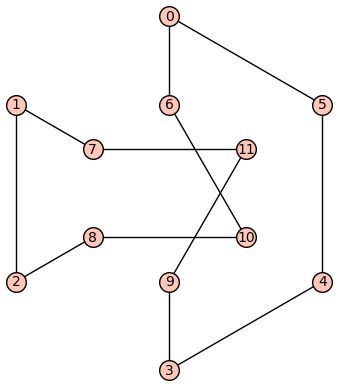

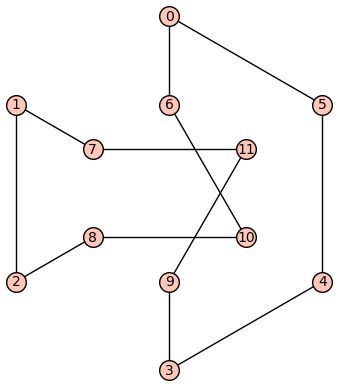

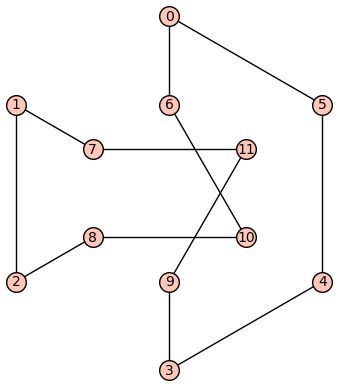

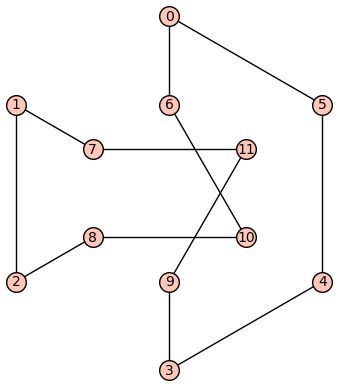

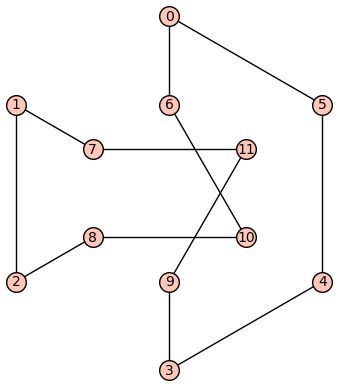

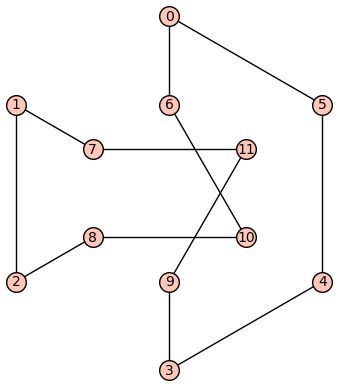

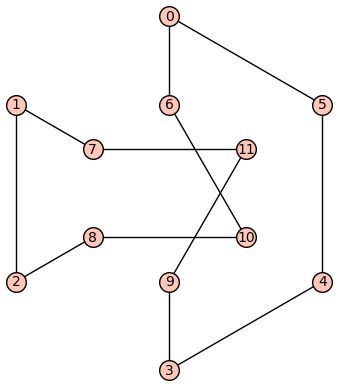

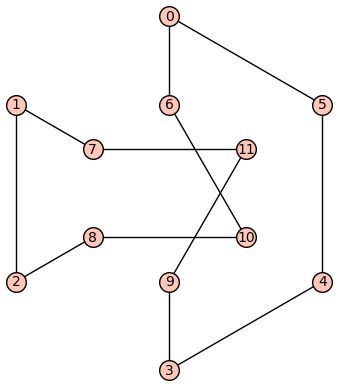

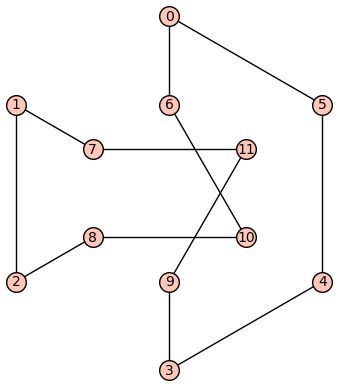

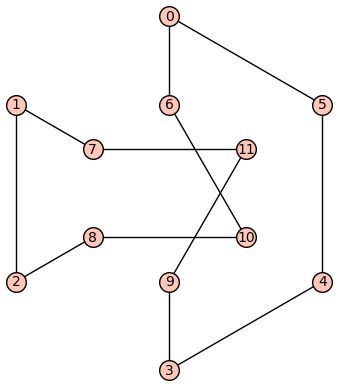

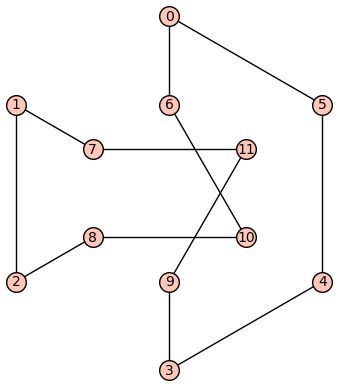

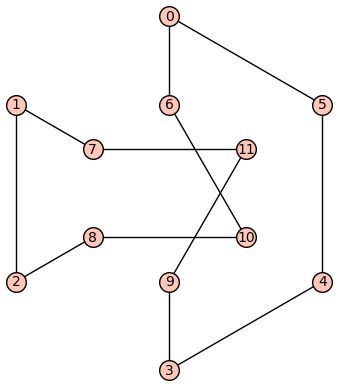

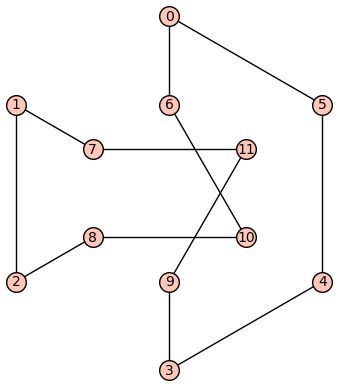

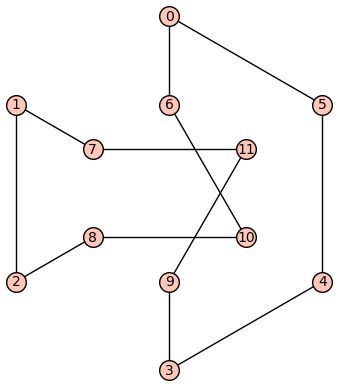

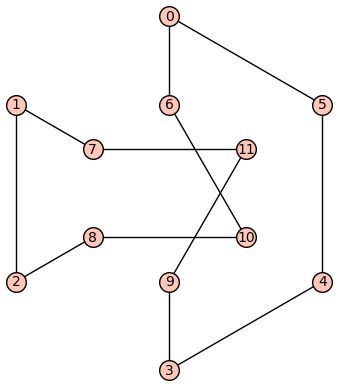

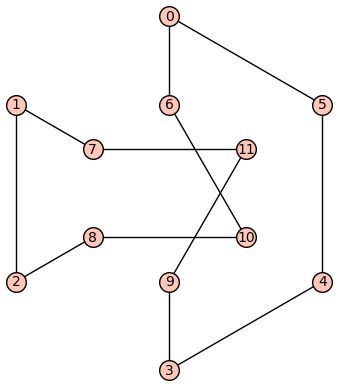

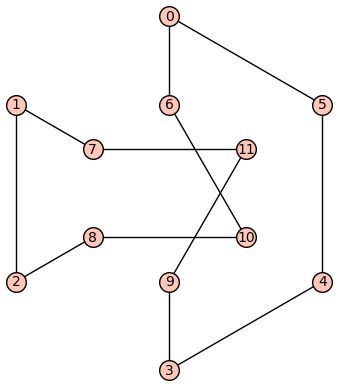

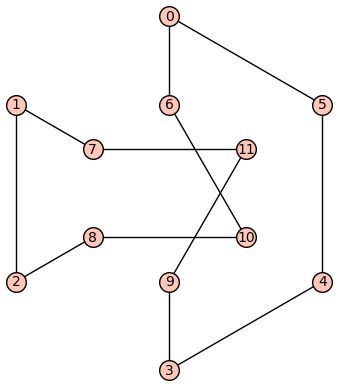

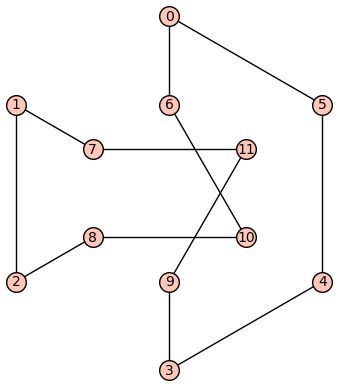

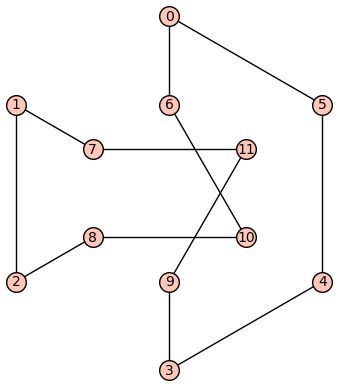

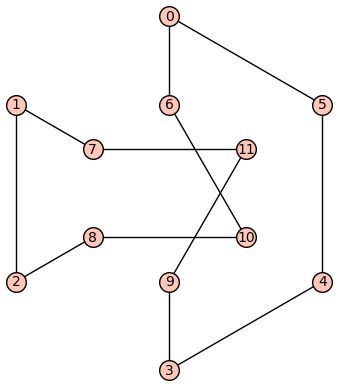

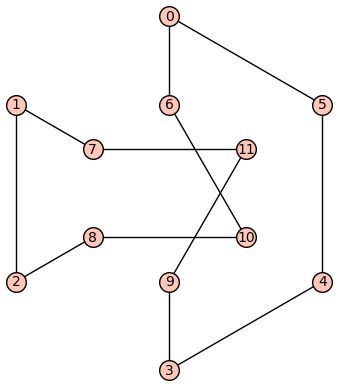

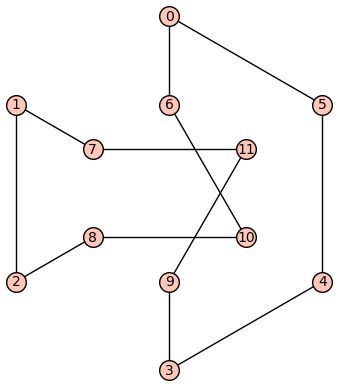

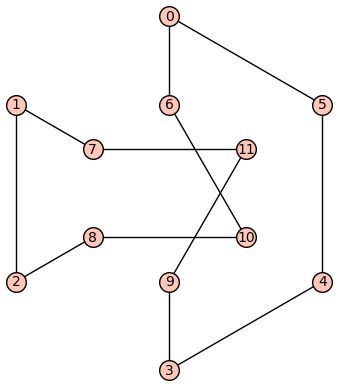

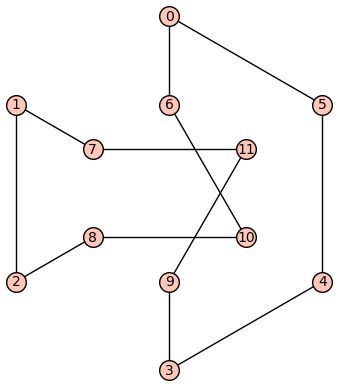

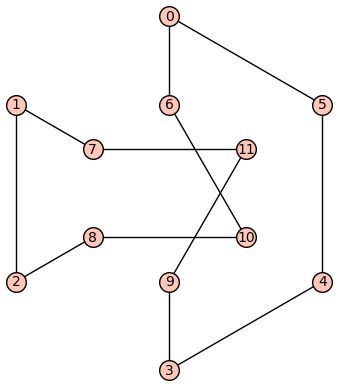

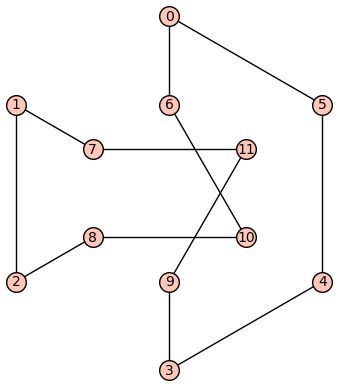

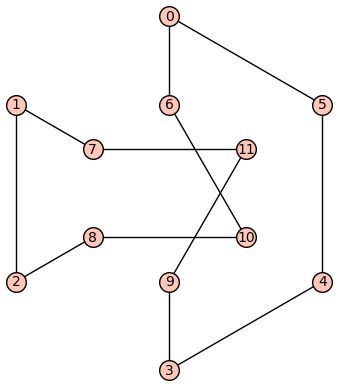

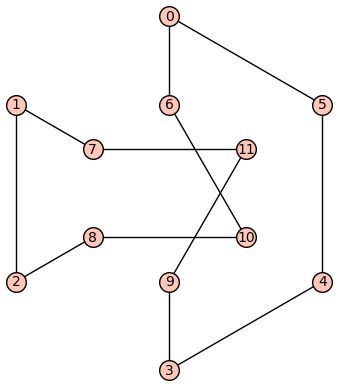

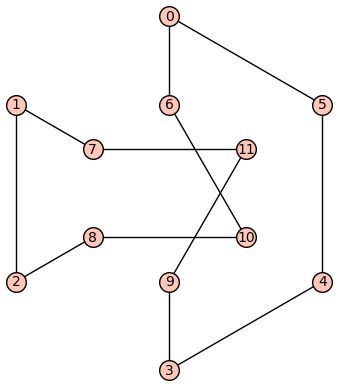

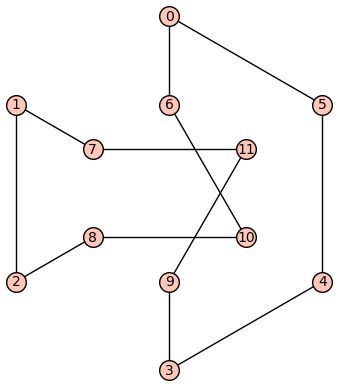

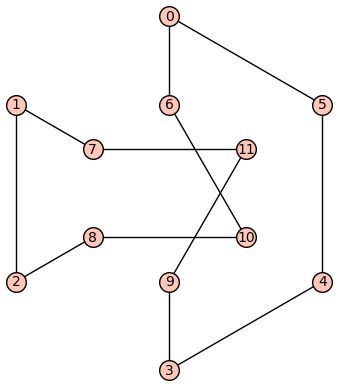

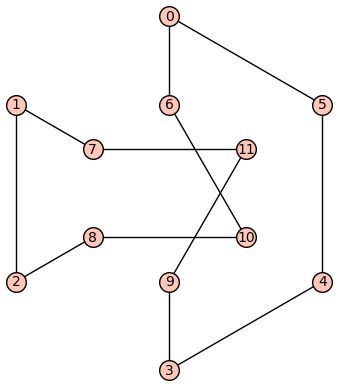

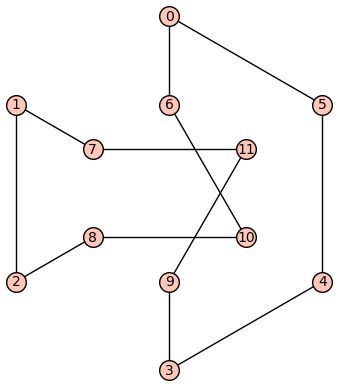

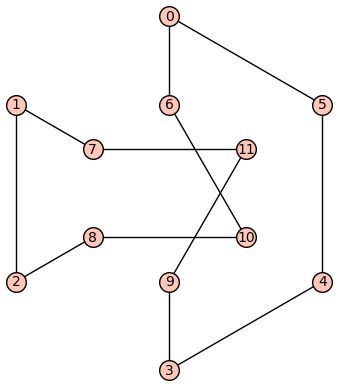

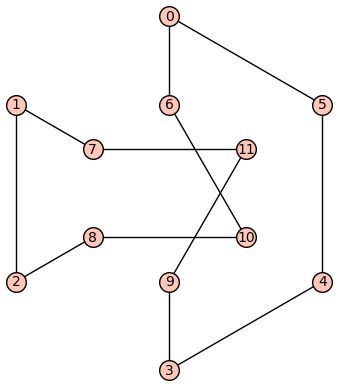

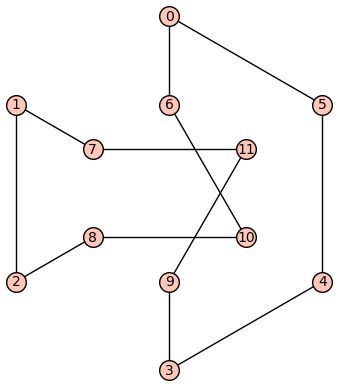

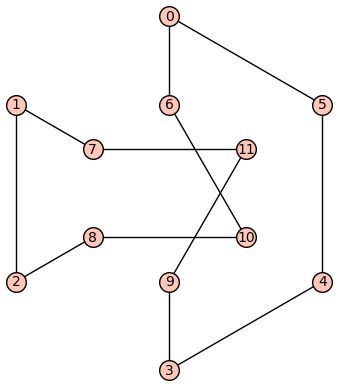

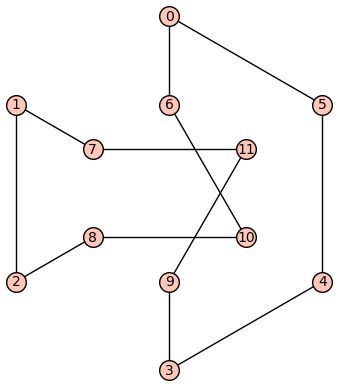

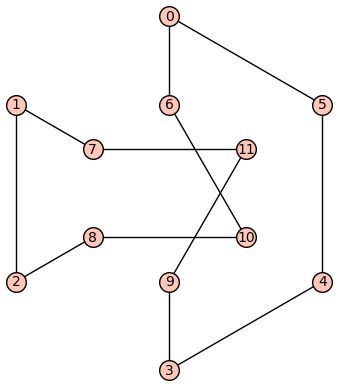

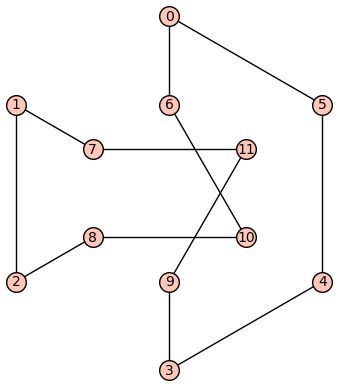

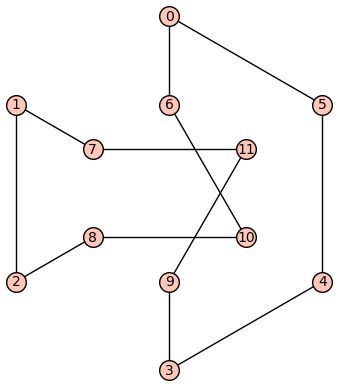

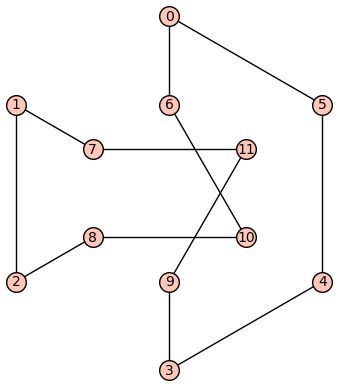

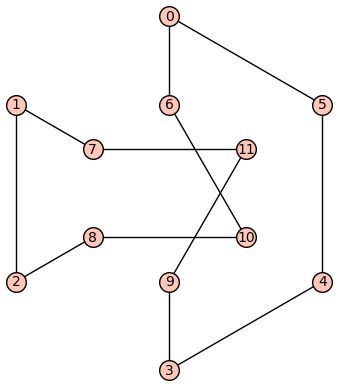

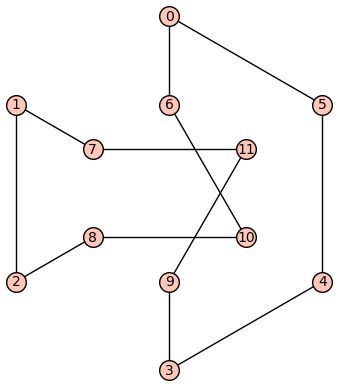

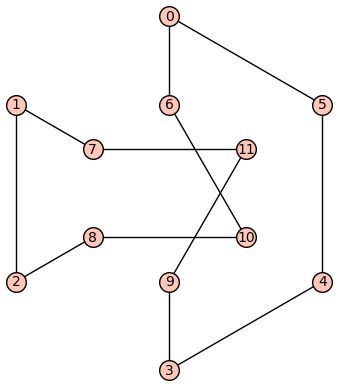

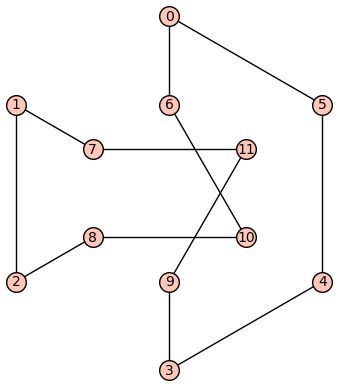

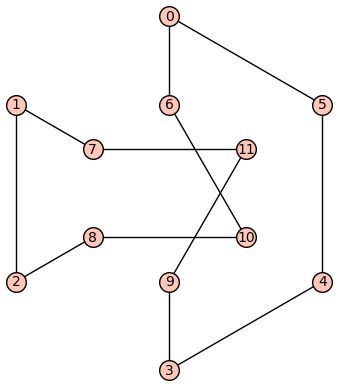

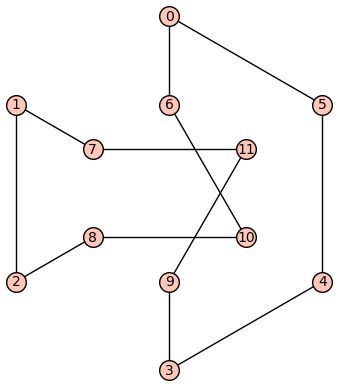

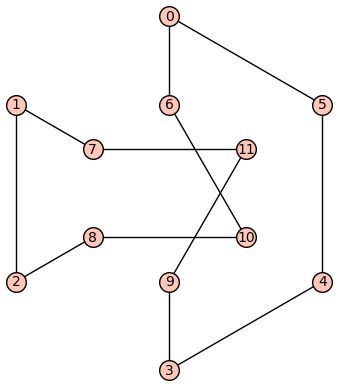

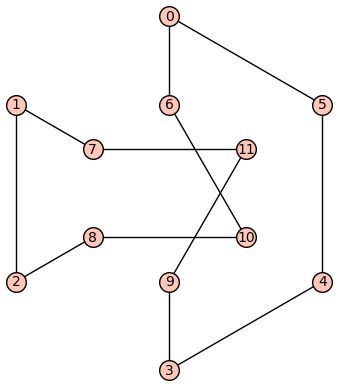

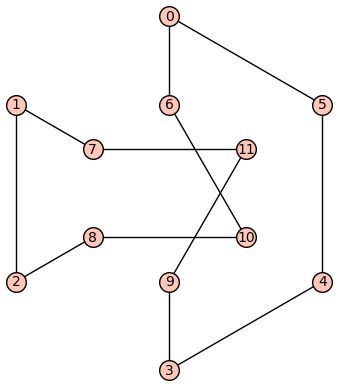

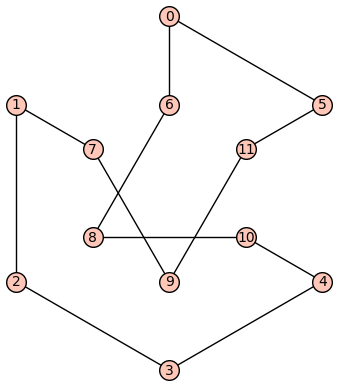

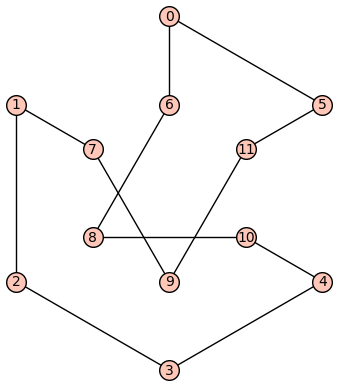

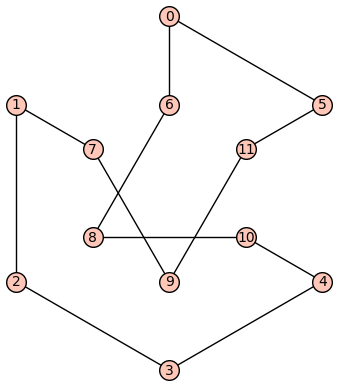

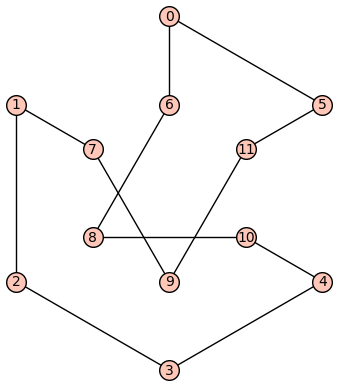

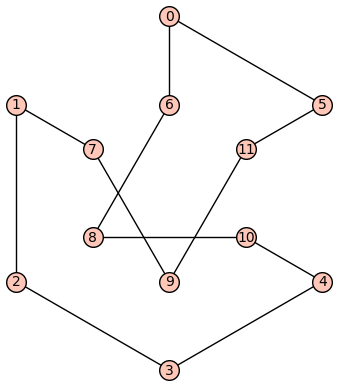

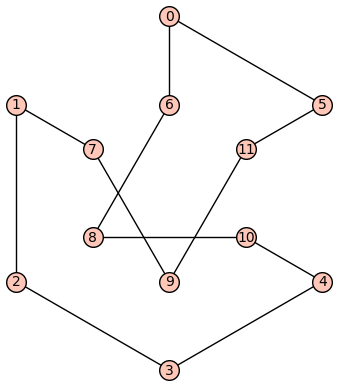

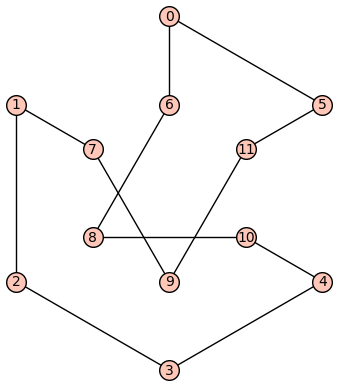

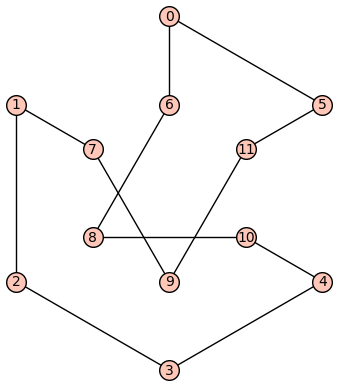

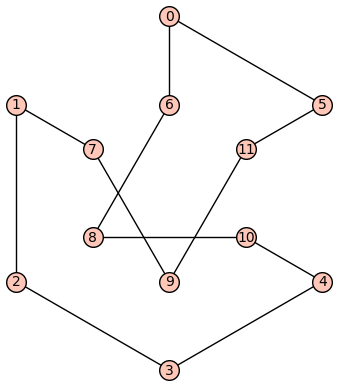

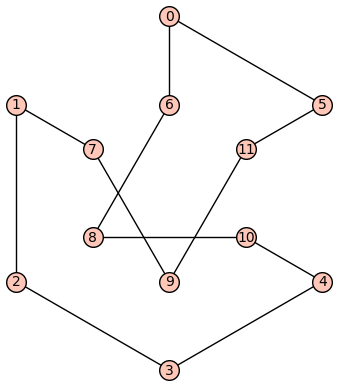

KeyboardInterrupt: 

In [67]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.plot(save_pos=True).show()
pos=G.get_pos()


count=0
for c in hamiltonian_cycles_cubic(G):
    c.show(pos=pos)
    count+=1
count


In [ ]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.plot(save_pos=True).show()
pos=G.get_pos()


count=0
for c in hamiltonian_cycles_cubic(G):
    c.show(pos=pos)
    count+=1
count


## Exercise 3

Write a function that computes the Hamiltonian closure of a graph `G`. Recall that if `G` has  `n` vertices, its Hamiltonian closure is obtained by adding edges between non-adjacent vertices whose sum of degrees is at least `n` as long as you can do so.

In [28]:
def hamiltonian_closure(G):
    #Write your code here
    has_changed = True
    while has_changed :
        has_changed = False
        for v in G.vertices() :
            for u in Set(G.vertices()).difference(G.neighbors(v)) :
                if G.degree(v) + G.degree(u) >= G.order() and u != v :
                    has_changed = True
                    G.add_edge((u, v))
                    
    return G

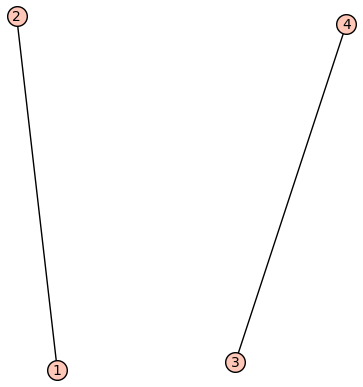

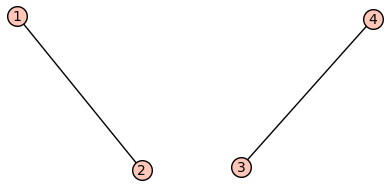

In [29]:
G=Graph([(1,2), (3, 4)])
G.show()
G=hamiltonian_closure(G)
G.show()

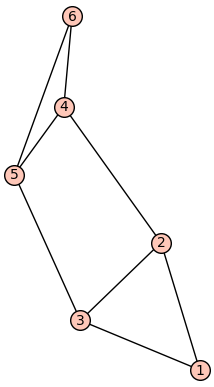

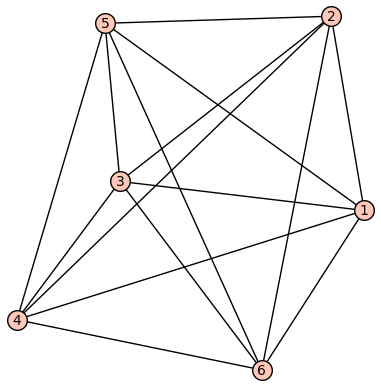

In [30]:
G=Graph([(1,2),(1,3),(2,3),(2,4),(3,5),(4,5),(4,6),(5,6)])
G.show()
G=hamiltonian_closure(G)
G.show()

## Exercise 4

Write a function that generates all Hamiltonian cycles of a given simple graph `G`.



In [44]:
def hamiltonian_cycles(G):
    #Write your code here
    def hamiltonian_paths (P, H) :
        paths = []
        if len(P) == H.order() :
            yield P 
        for u in H.neighbors(P[-1]) :
            if u not in P :
                for p in hamiltonian_paths(P.copy() + [u], H) :
                    if p not in paths :
                        paths.append(p)
                        yield p
    
    v = G.random_vertex()
    P = [v]
    
    hpaths = []
    
    for p in hamiltonian_paths(P, G) :
        if p[-1] in G.neighbors(v) :
            T = Graph()
            for i in range(len(p) - 1) :
                T.add_edge(p[i], p[i + 1], G.edge_label(p[i], p[i+1]))
            T.add_edge(p[-1], v, G.edge_label(p[-1], v))
            if T not in hpaths :
                hpaths.append(T.copy())
                yield T

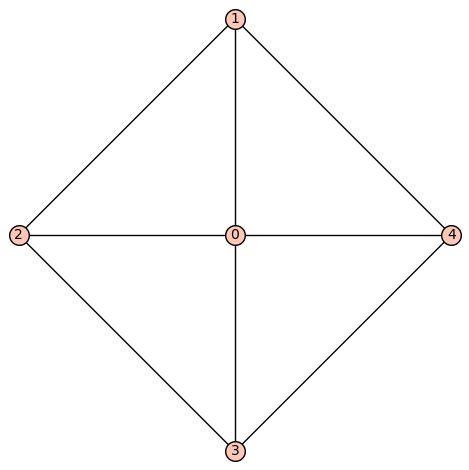

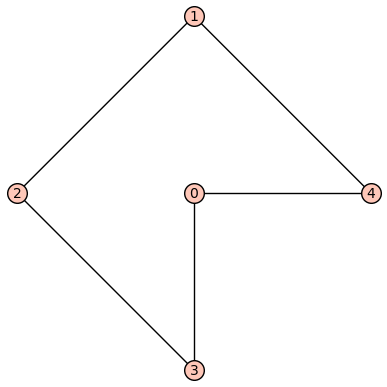

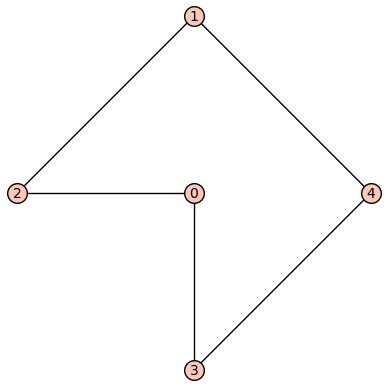

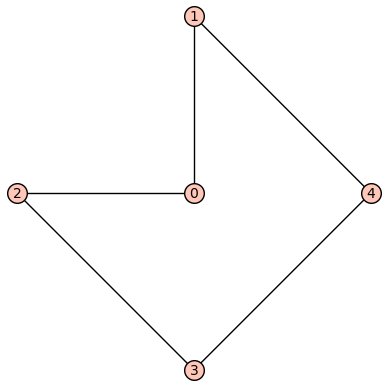

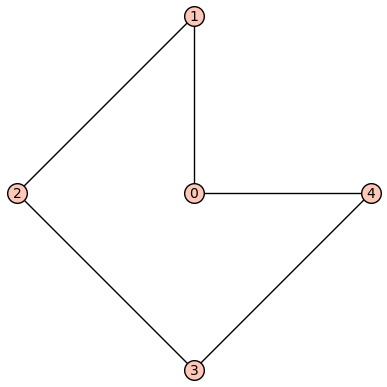

In [45]:
G=graphs.WheelGraph(5)

G.plot(save_pos=True).show()
pos=G.get_pos()


for c in hamiltonian_cycles(G):
    c.show(pos=pos)

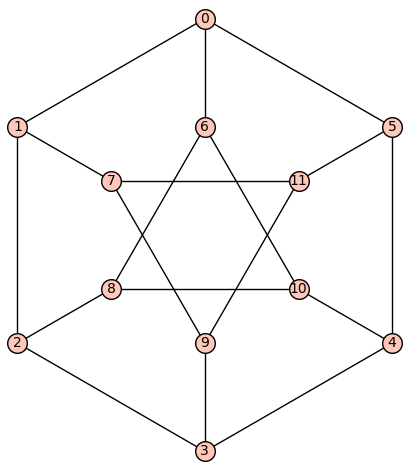

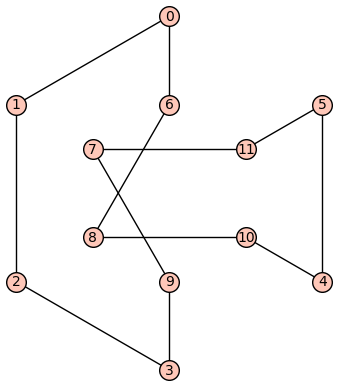

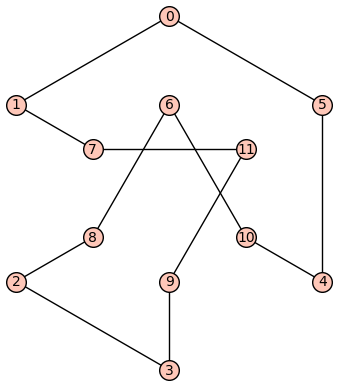

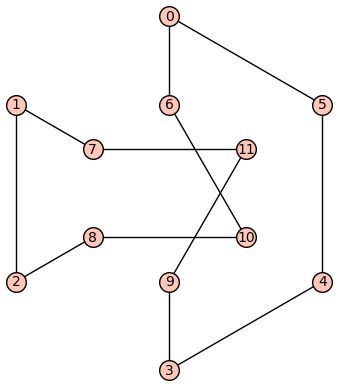

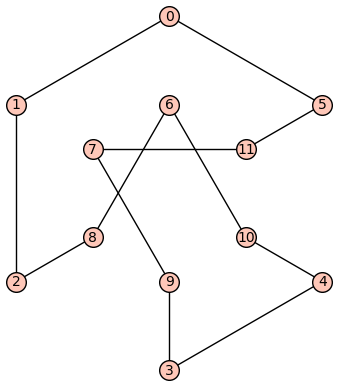

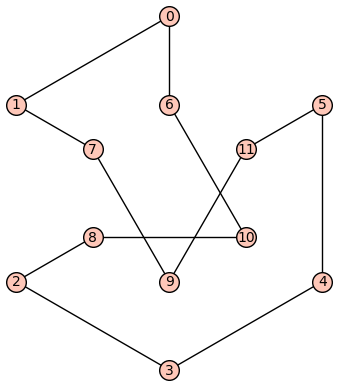

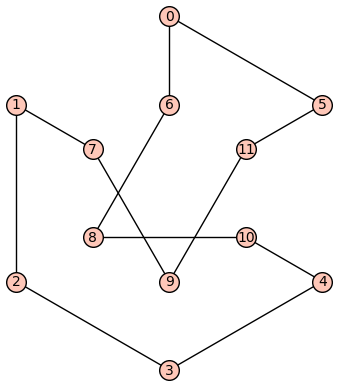

6

In [46]:
G=graphs.GeneralizedPetersenGraph(6,2)

G.plot(save_pos=True).show()
pos=G.get_pos()

count=0
for c in hamiltonian_cycles(G):
    c.show(pos=pos)
    count +=1

count

## Exercise 5

Adapt the previous algorithm to solve the Traveling Salesman Problem on graphs with non-negative weights. That is, to compute the Hamiltonian cycle of minimal weight in a weighted graph. The fact that the weights are non-negative allows to introduce an additional backtracking condition: if the current partial cycle has larger weight than our current best hamiltonian cycle, we can abort.

In [118]:
from sage.rings.infinity import Infinity

def tsp(G):
    #Write your code here    
    n = G.order()
    best_cycle = None
    best_cycle_weight = Infinity
    
    def dfs (u, path, unused_u, weight) :
        nonlocal best_cycle, best_cycle_weight
        
        path.append(u)
        unused_u.remove(u)
        if len(path) == n :
            if G.has_edge(path[-1], path[0]) :
                weight += G.edge_label(path[-1], path[0])
                if weight < best_cycle_weight :
                    cycle_edges = [
                        (path[i], path[i+1], G.edge_label(path[i], path[i+1]))
                        for i in range(n-1)
                    ] + [(path[-1], path[0], G.edge_label(path[-1], path[0]))]
                    best_cycle = Graph(cycle_edges)
                    best_cycle_weight = weight
        else :
            for neighbor in G.neighbors(u) :
                if neighbor in unused_u :
                    next_weight = weight + G.edge_label(u, neighbor)
                    if next_weight < best_cycle_weight :
                        dfs(neighbor, path, unused_u, next_weight)
        path.pop()
        unused_u.add(u)
            
    for u in G:
        path = []
        unused_u = set(G)
        dfs(u, path, unused_u, 0)
    return best_cycle

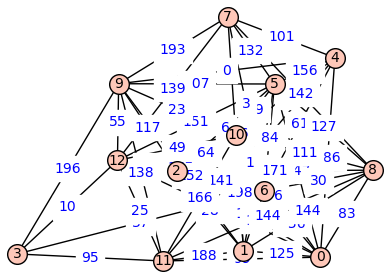

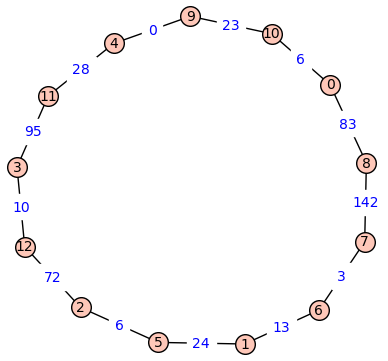

cost = 505


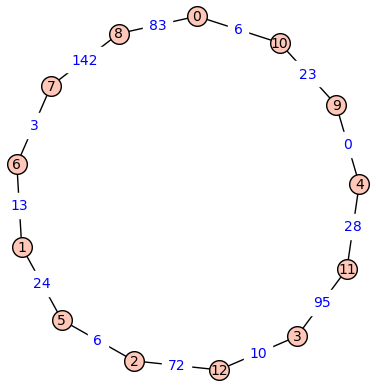

cost = 505
True
sage implementation: 0.0023767948150634766  our implementation: 5.805167198181152


In [119]:
import time,random

N=13

G=graphs.RandomGNP(N,.75)


while not G.is_connected():
    print("Random graph was not connected. Let's try again" )
    G=graphs.RandomGNP(N,.75)

for e in G.edges():
    G.set_edge_label(e[0],e[1],random.randint(0,200))
    

    
    
G.show(edge_labels=True)




start_time = time.time()

sageTSP=G.traveling_salesman_problem(use_edge_labels=True)

time_sage=time.time() - start_time
  
sageTSP.show(edge_labels=True)
print('cost =', sum(e[2] for e in sageTSP.edges()))


start_time = time.time()
myTSP=tsp(G)

time_our=time.time() - start_time

myTSP.show(edge_labels=True)
print('cost =', sum(e[2] for e in myTSP.edges()))

print(sageTSP==myTSP)

print("sage implementation:", time_sage," our implementation:", time_our)


## Exercise 6

Combine `hamiltonian_closure` and the generator `hamiltonian_cycles` to check whether a given connected graph is Hamiltonian.

In [68]:
def is_hamiltonian(G):
    #Write your code here
    C = hamiltonian_closure(G.copy())
    for _ in hamiltonian_cycles(C) :
        return True
    return False

In [69]:
for n in range(3,15):
    for k in range(1,(n-1)//2 +1):
        G=graphs.GeneralizedPetersenGraph(n,k)
        print('sage: ',G.is_hamiltonian(),' we:',is_hamiltonian(G))

sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  False  we: False
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True
sage:  True  we: True


## Exercise 7

Write a function that computes the greedy coloring of a graph `G` with respect to a given ordering `O` (given as a list of vertices). It should return a dictionary of colors associated to the vertices.

In [86]:
def greedy_coloring(G,O):
    #Write your code here
    color = {}
    color[O[0]] = 0
    for u in range(1, len(G.vertices())) :
        k = set()
        for v in range(0, u) :
            if O[v] in G.neighbors(O[u]) :
                k.add(color[O[v]])
        minnotnei=0
        while minnotnei in k :
            minnotnei += 1
        color[O[u]] = minnotnei

    return color

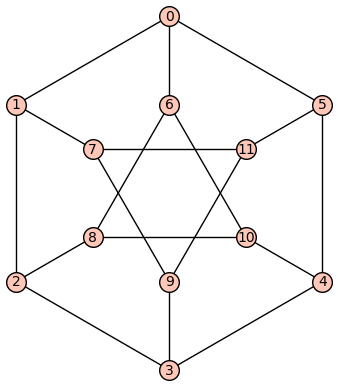

[4, 2, 8, 5, 10, 7, 6, 11, 3, 9, 1, 0]


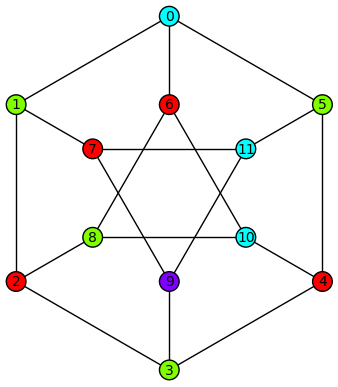

In [87]:
from sage.plot.colors import rainbow
import random

G=graphs.GeneralizedPetersenGraph(6,2)
G.show()

V=G.vertices()

random.shuffle(V)

print(V)

colors=greedy_coloring(G,V)

X=max(colors.values())+1

Rainbow=rainbow(X)

colormap={r:[] for r in Rainbow}

for v in colors:
    colormap[Rainbow[colors[v]]].append(v)
    
G.show(vertex_colors=colormap)


## Exercise 8

Write am algorithm that computes the degeneracy of a graph. If the optional argument `order` is set to `True`, then it returns a degeneracy as well as a list with one ordering of the vertices in which the vertices have to be inserted to attain this degeneracy.

In [76]:
d = { 1: 3, 2: 4, 3: 5, 4: 3 }

D = [ [] for _ in range(max(d.values()) + 1) ]

for key, value in d.items() :
    print(key, value)
    if D[value] is None :
        D[value] = []
    D[value].append(key)
    
print(D)


1 3
2 4
3 5
4 3
[[], [], [], [1, 4], [2], [3]]


In [83]:
from collections import deque
def degeneracy(G, order=False):
    #Write your code here
    
    perm = deque([])
    
    d = { v: G.degree(v) for v in G.vertices() }
    
    D = [ [] for _ in range(max(d.values()) + 1) ]

    for key, value in d.items() :
        print(key, value)
        if D[value] is None :
            D[value] = []
        D[value].append(key)
            
    deg = 0
    
    for _ in range(len(d)) :
        for i, D_i in enumerate(D) :
            if len(D_i) != 0 :
                deg = max(deg, i)
                v = D_i.pop()
                perm.appendleft(v)
                for u in G.neighbors(v) :
                    if u not in perm :
                        D[d[u]].remove(u)
                        d[u] = d[u] - 1
                        D[d[u]].append(u)
                break
    
    if order:
        return (deg,list(perm))
    return deg


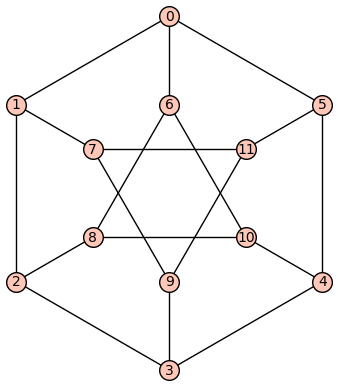

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
degeneracy= 3 [8, 10, 6, 0, 5, 4, 3, 2, 1, 7, 9, 11]


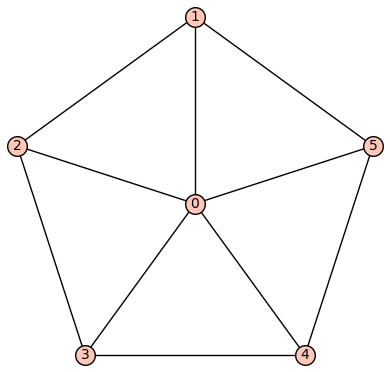

1 3
2 3
3 3
4 3
5 3
0 5
degeneracy= 3 [1, 2, 0, 3, 4, 5]


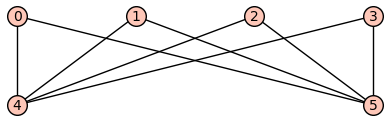

0 2
1 2
2 2
3 2
4 4
5 4
degeneracy= 2 [0, 4, 1, 5, 2, 3]


In [84]:
for G in [graphs.GeneralizedPetersenGraph(6,2),graphs.WheelGraph(6),graphs.CompleteBipartiteGraph(4,2)]:
    G.show()
    deg,order=degeneracy(G,order=True)
    print('degeneracy=',deg,order)



Compare the chromatic number (computed by sage), the number of colors used by the greedy algorithm using an ordering attaining degeneracy, and the degeneracy plus one.

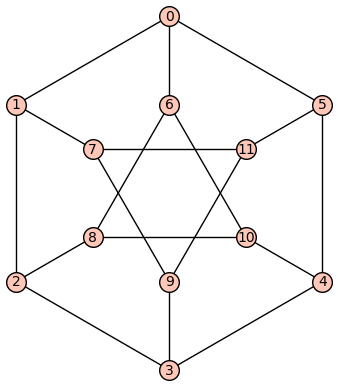

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
chromatic number =  3 ; greedy coloring =  4 ; degeneracy + 1 =  4


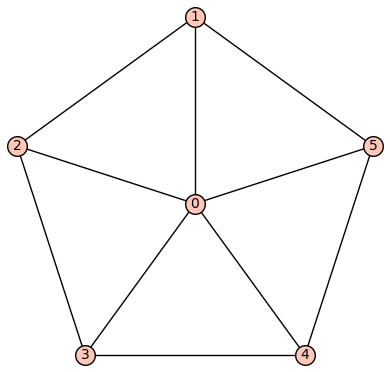

1 3
2 3
3 3
4 3
5 3
0 5
chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  4


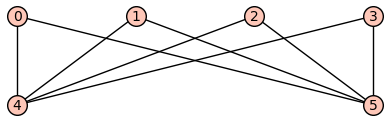

0 2
1 2
2 2
3 2
4 4
5 4
chromatic number =  2 ; greedy coloring =  2 ; degeneracy + 1 =  3


In [88]:
for G in [graphs.GeneralizedPetersenGraph(6,2),graphs.WheelGraph(6),graphs.CompleteBipartiteGraph(4,2)]:
    G.show()
    X=G.chromatic_number()
    deg,order=degeneracy(G,order=True)
    cols=greedy_coloring(G,order)
    gX=max(cols.values())+1
    print('chromatic number = ', X, '; greedy coloring = ', gX, '; degeneracy + 1 = ',deg+1)

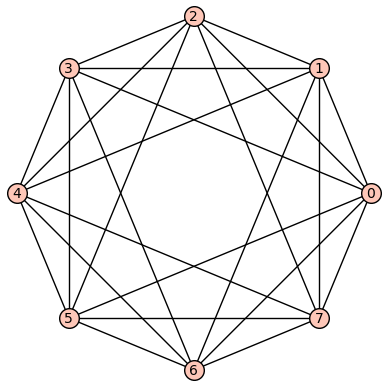

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  7


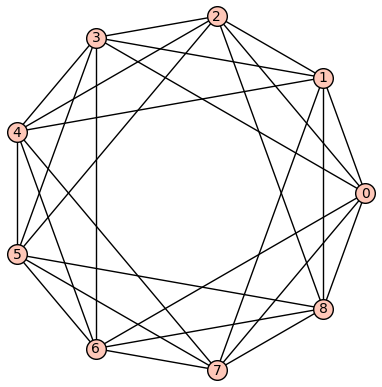

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
chromatic number =  5 ; greedy coloring =  5 ; degeneracy + 1 =  7


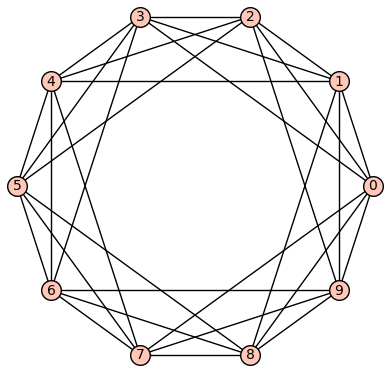

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
chromatic number =  5 ; greedy coloring =  6 ; degeneracy + 1 =  7


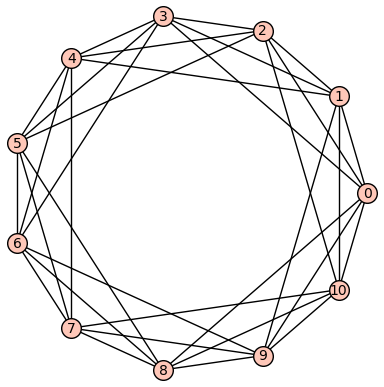

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
chromatic number =  6 ; greedy coloring =  7 ; degeneracy + 1 =  7


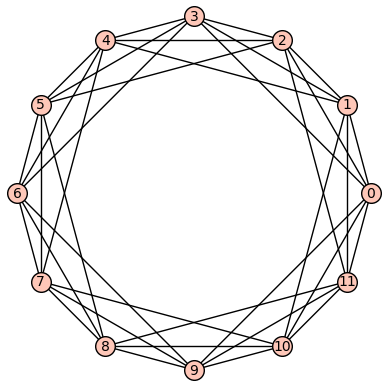

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
chromatic number =  4 ; greedy coloring =  4 ; degeneracy + 1 =  7


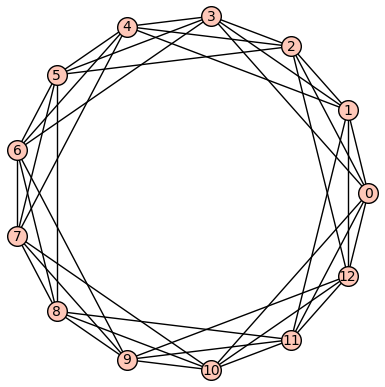

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
12 6
chromatic number =  5 ; greedy coloring =  5 ; degeneracy + 1 =  7


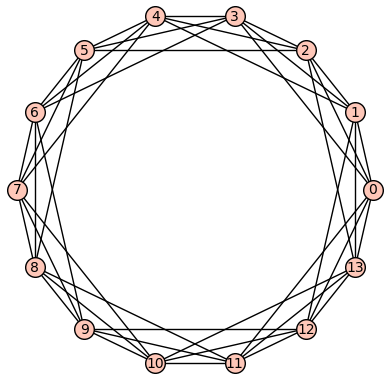

0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
12 6
13 6
chromatic number =  5 ; greedy coloring =  6 ; degeneracy + 1 =  7


In [89]:
for n in range(8,15):
    G=graphs.CirculantGraph(n,[1,2,3])
    G.show()
    X=G.chromatic_number()
    deg,order=degeneracy(G,order=True)
    cols=greedy_coloring(G,order)
    gX=max(cols.values())+1
    print('chromatic number = ', X, '; greedy coloring = ', gX, '; degeneracy + 1 = ',deg+1)

## Appendix

The following example uses backtracking to compute all ways of selecting `n` cells in an `m x m` grid in such a way that no two cells in the same row or columns are used.

A partial solution would consist of selecting some cells in the first `k` columns in such a way that the constraints are verified. As soon as there are more than `m-k` cells to be distributed in the last `m-k` columns, the algorithm backtracks.

In [ ]:
def rook_placement (n,m):
# returns a list containing all the ways of selecting n cells in an m x m grid
# in such a way that there are no two cells in the same row or column
    
    def recursive_rook_placement(n,m,k,forbidden_cols):
#         Auxiliar recursive function that computes a partial solution for the rook placement problem
#         in which only cells in the last m-k rows 
#         and in the columns that do not belong to forbidden_cols can be used

#         forbidden_cols is a set of columns that cannot be used in the solution

#         returns a list containing all the ways of selecting n cells in the last m-k rows of an m x m grid
#         in such a way that there are no two cells in the same row or column, 
#         and no cell is in one of the forbidden_cols
        
        solutions=[] #will contain the solutions

        
        if n>m-k:
#             if we do not have enough columns to place all cells, we cannot complete this solution. 

#             we backtrack and return an empty list
            return solutions



        if n<=0:
#             if we do not have anything to add then the empty solution is the only solution

            solutions.append([])

            return solutions
        
        

        for i in range(k,m):
#                 we try to continue our solution when the next noempty row is i
            for j in range(m):
#                 we try to insert the cell (i,j)

                if not j in forbidden_cols:
                    forbidden_cols.add(j)

                    for sol in recursive_rook_placement(n-1,m,i+1,forbidden_cols):
                        sol.append((i,j))
                        
#                         a solution has been found
                        solutions.append(sol)

                    forbidden_cols.remove(j)

                
        return solutions

#     the main function just calls the recursive function with no forbidden rows and k=0

    return recursive_rook_placement(n,m,0,set())
    

In [ ]:
n=2
m=3

G=graphs.Grid2dGraph(m,m)


for sol in rook_placement(n,m):
    G.show(vertex_colors={'red': sol})

A version with generators is the following:

In [ ]:
def rook_placement_gen (n,m):
# returns a generator containing all the ways of selecting n cells in an m x m grid
# in such a way that there are no two cells in the same row or column
    
    def recursive_rook_placement_gen(n,m,k,forbidden_cols):
#         Auxiliar recursive function that computes a partial solution for the rook placement problem
#         in which only cells in the last m-k rows 
#         and in the columns that do not belong to forbidden_cols can be used

#         forbidden_cols is a set of columns that cannot be used in the solution

#         returns a list containing all the ways of selecting n cells in the last m-k rows of an m x m grid
#         in such a way that there are no two cells in the same row or column, 
#         and no cell is in one of the forbidden_cols


        
        if n>m-k:
#             if we do not have enough columns to place all cells, we cannot complete this solution. 

#             we backtrack and return
            return 



        if n<=0:
#             if we do not have anything to add then the empty solution is the only solution

            yield []
            return
        
        

        for i in range(k,m):
#                 we try to continue our solution when the next noempty row is i
            for j in range(m):
#                 we try to insert the cell (i,j)

                if not j in forbidden_cols:
                    forbidden_cols.add(j)

                    for sol in recursive_rook_placement_gen(n-1,m,i+1,forbidden_cols):
                        sol.append((i,j))
                        
#                         a solution has been found
                        
                        yield sol

                    forbidden_cols.remove(j)
         
        return

                

#     the main function just calls the recursive function with no forbidden rows and k=0

    return recursive_rook_placement_gen(n,m,0,set())
    

In [ ]:
n=2
m=3

G=graphs.Grid2dGraph(m,m)


for sol in rook_placement_gen(n,m):
    G.show(vertex_colors={'red': sol})